In [1]:
import numpy as np
import sqlite3 as sqlite
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#punjab national bank dataset
df=pd.read_csv('PNB.csv')
print(df)
print('*****************************************************************************************************')
print(df.shape)

    Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0      PNB     EQ  15-May-2017      169.15      169.95      171.30     166.20   
1      PNB     EQ  16-May-2017      166.80      167.35      178.00     164.80   
2      PNB     EQ  17-May-2017      174.15      173.00      173.10     164.30   
3      PNB     EQ  18-May-2017      165.05      163.40      164.40     157.90   
4      PNB     EQ  19-May-2017      158.50      159.50      162.25     154.10   
..     ...    ...          ...         ...         ...         ...        ...   
489    PNB     EQ  07-May-2019       86.25       86.70       87.15      83.40   
490    PNB     EQ  08-May-2019       83.95       83.75       85.40      83.25   
491    PNB     EQ  09-May-2019       83.95       84.10       85.35      82.80   
492    PNB     EQ  10-May-2019       84.25       85.00       87.25      84.40   
493    PNB     EQ  13-May-2019       86.25       86.15       86.20      79.05   

     Last Price  Close Pric

In [3]:
df=df[df['Series']=='EQ']
print(df)

    Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0      PNB     EQ  15-May-2017      169.15      169.95      171.30     166.20   
1      PNB     EQ  16-May-2017      166.80      167.35      178.00     164.80   
2      PNB     EQ  17-May-2017      174.15      173.00      173.10     164.30   
3      PNB     EQ  18-May-2017      165.05      163.40      164.40     157.90   
4      PNB     EQ  19-May-2017      158.50      159.50      162.25     154.10   
..     ...    ...          ...         ...         ...         ...        ...   
489    PNB     EQ  07-May-2019       86.25       86.70       87.15      83.40   
490    PNB     EQ  08-May-2019       83.95       83.75       85.40      83.25   
491    PNB     EQ  09-May-2019       83.95       84.10       85.35      82.80   
492    PNB     EQ  10-May-2019       84.25       85.00       87.25      84.40   
493    PNB     EQ  13-May-2019       86.25       86.15       86.20      79.05   

     Last Price  Close Pric

In [4]:
#this indicates all the values in series columns are EQ
df['Series'].value_counts()

EQ    494
Name: Series, dtype: int64

In [5]:
#this indicates there are no repeated dates in the data
df=df.drop_duplicates(subset={"Date"},keep="first",inplace=False)
print(df.shape)

(494, 15)


In [6]:
price=df['Close Price']
print(price)

0      166.80
1      174.15
2      165.05
3      158.50
4      155.20
        ...  
489     83.95
490     83.95
491     84.25
492     86.25
493     79.80
Name: Close Price, Length: 494, dtype: float64


In [7]:
#price for last 90 days
price=price.loc[404:]
print(price)

404    78.10
405    79.80
406    77.85
407    77.85
408    81.30
       ...  
489    83.95
490    83.95
491    84.25
492    86.25
493    79.80
Name: Close Price, Length: 90, dtype: float64


In [8]:
#mean price for last 90 days
mean_price=price.mean()
print(mean_price)

82.71555555555557


In [9]:
#max price in last 90 days
max_price=price.max()
print(max_price)

98.3


In [10]:
#min price in 90 days
min_price=price.min()
print(min_price)

69.0


In [11]:
print(df["Date"].dtype)

object


In [12]:
#converting it to datetime64(ns)
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


In [13]:
#max date - min date
print(df['Date'].max()-df['Date'].min())

728 days 00:00:00


In [14]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
print(df)

    Symbol Series       Date  Prev Close  Open Price  High Price  Low Price  \
0      PNB     EQ 2017-05-15      169.15      169.95      171.30     166.20   
1      PNB     EQ 2017-05-16      166.80      167.35      178.00     164.80   
2      PNB     EQ 2017-05-17      174.15      173.00      173.10     164.30   
3      PNB     EQ 2017-05-18      165.05      163.40      164.40     157.90   
4      PNB     EQ 2017-05-19      158.50      159.50      162.25     154.10   
..     ...    ...        ...         ...         ...         ...        ...   
489    PNB     EQ 2019-05-07       86.25       86.70       87.15      83.40   
490    PNB     EQ 2019-05-08       83.95       83.75       85.40      83.25   
491    PNB     EQ 2019-05-09       83.95       84.10       85.35      82.80   
492    PNB     EQ 2019-05-10       84.25       85.00       87.25      84.40   
493    PNB     EQ 2019-05-13       86.25       86.15       86.20      79.05   

     Last Price  Close Price  Average Price  Total 

In [15]:
df['month'].value_counts()

1     45
7     43
5     43
11    42
8     42
6     42
10    41
12    40
4     40
9     39
2     39
3     38
Name: month, dtype: int64

In [16]:
df_per_year=df.groupby('year')

In [17]:
years=[]
months_2017=[]
months_2018=[]
months_2019=[]
VWAP_2017=[]
VWAP_2018=[]
VWAP_2019=[]
for year,df_year in df_per_year:
    df_per_month=df_year.groupby('month')
    years.append(year)
    for month,df_month in df_per_month:
        x=[]
        x=(((df_month['High Price']+df_month['Low Price']+df_month['Close Price'])/3)*df_month['Total Traded Quantity'])
        if(year==2017):
            months_2017.append(month)
            VWAP_2017.append(x.sum())
        elif(year==2018):
            months_2018.append(month)
            VWAP_2018.append(x.sum())
        elif(year==2019):
            months_2019.append(month)
            VWAP_2019.append(x.sum())
            
        x=[]

In [18]:
print(months_2017)
print("**********************************************")
print(VWAP_2017)

[5, 6, 7, 8, 9, 10, 11, 12]
**********************************************
[35264984867.05, 22294902796.149998, 26223007957.53333, 31897763404.3, 17127472723.199999, 91665549749.01666, 94441304241.33334, 57525766451.61667]


In [19]:
VWAP_monthly_2017=pd.DataFrame({"month":months_2017,"VWAP_2017":VWAP_2017})
VWAP_monthly_2018=pd.DataFrame({"month":months_2018,"VWAP_2018":VWAP_2018})
VWAP_monthly_2019=pd.DataFrame({"month":months_2019,"VWAP_2019":VWAP_2019})

In [20]:
print(VWAP_monthly_2017)
print("******************************************************************************************************")
print(VWAP_monthly_2018)
print("******************************************************************************************************")
print(VWAP_monthly_2019)

   month     VWAP_2017
0      5  3.526498e+10
1      6  2.229490e+10
2      7  2.622301e+10
3      8  3.189776e+10
4      9  1.712747e+10
5     10  9.166555e+10
6     11  9.444130e+10
7     12  5.752577e+10
******************************************************************************************************
    month     VWAP_2018
0       1  7.279514e+10
1       2  1.730250e+11
2       3  8.479271e+10
3       4  4.575416e+10
4       5  4.609316e+10
5       6  4.030232e+10
6       7  4.974111e+10
7       8  7.608831e+10
8       9  4.636482e+10
9      10  3.777362e+10
10     11  3.082136e+10
11     12  3.303354e+10
******************************************************************************************************
   month     VWAP_2019
0      1  3.511532e+10
1      2  3.489912e+10
2      3  6.727285e+10
3      4  5.235206e+10
4      5  1.554747e+10


In [21]:
VWAP=pd.merge(VWAP_monthly_2017,VWAP_monthly_2018,on="month",how='outer')

In [22]:
#final vwap monthly list for every year 
VWAP=pd.merge(VWAP,VWAP_monthly_2019,on='month',how='outer')
print(VWAP)

    month     VWAP_2017     VWAP_2018     VWAP_2019
0       5  3.526498e+10  4.609316e+10  1.554747e+10
1       6  2.229490e+10  4.030232e+10           NaN
2       7  2.622301e+10  4.974111e+10           NaN
3       8  3.189776e+10  7.608831e+10           NaN
4       9  1.712747e+10  4.636482e+10           NaN
5      10  9.166555e+10  3.777362e+10           NaN
6      11  9.444130e+10  3.082136e+10           NaN
7      12  5.752577e+10  3.303354e+10           NaN
8       1           NaN  7.279514e+10  3.511532e+10
9       2           NaN  1.730250e+11  3.489912e+10
10      3           NaN  8.479271e+10  6.727285e+10
11      4           NaN  4.575416e+10  5.235206e+10


In [23]:
def avg_price(n):
    df_n=df[493-n:493]
    avg_price=df_n['Average Price'].mean()
    return avg_price

In [24]:
avg_price_1_week=avg_price(7)
avg_price_2_week=avg_price(14)
avg_price_1_month=avg_price(30)
avg_price_3_month=avg_price(90)
avg_price_6_month=avg_price(180)
avg_price_1_year=avg_price(365)

In [25]:
print(avg_price_1_week)
print("*******************************************************************************************")
print(avg_price_2_week)
print("*******************************************************************************************")
print(avg_price_1_month)
print("*******************************************************************************************")
print(avg_price_3_month)
print("*******************************************************************************************")
print(avg_price_6_month)
print("*******************************************************************************************")
print(avg_price_1_year)

85.74857142857142
*******************************************************************************************
86.78428571428572
*******************************************************************************************
90.85433333333336
*******************************************************************************************
82.87
*******************************************************************************************
78.15683333333328
*******************************************************************************************
98.6290136986301


In [26]:
def percentage_profit_loss(n):
    percent_change=((df.loc[493]['Close Price']-df.loc[493-n]['Close Price'])/df.loc[493-n]['Close Price'])*100
    return percent_change

In [27]:
#printing percentage profit/loss for last 1 week,2 week,1 month,3 month,6 month,1 year
print("percentage profit in a week:-",percentage_profit_loss(7))
print("************************************************************************")
print("percentage profit in 2 weeks:-",percentage_profit_loss(14))
print("************************************************************************")
print("percentage profit in a month:-",percentage_profit_loss(30))
print("************************************************************************")
print("percentage profit in 3 months:-",percentage_profit_loss(90))
print("************************************************************************")
print("percentage profit in 6 months:-",percentage_profit_loss(180))
print("************************************************************************")
print("percentage profit in a year:-",percentage_profit_loss(365))

percentage profit in a week:- -7.317073170731704
************************************************************************
percentage profit in 2 weeks:- -11.382565241532483
************************************************************************
percentage profit in a month:- -13.729729729729733
************************************************************************
percentage profit in 3 months:- 1.7208413001911973
************************************************************************
percentage profit in 6 months:- -0.7462686567164285
************************************************************************
percentage profit in a year:- -57.91139240506329


In [28]:
k=pd.DataFrame(df['Close Price'])
df["Day_Perc_Change"]=k.pct_change()*100

In [29]:
print(df)

    Symbol Series       Date  Prev Close  Open Price  High Price  Low Price  \
0      PNB     EQ 2017-05-15      169.15      169.95      171.30     166.20   
1      PNB     EQ 2017-05-16      166.80      167.35      178.00     164.80   
2      PNB     EQ 2017-05-17      174.15      173.00      173.10     164.30   
3      PNB     EQ 2017-05-18      165.05      163.40      164.40     157.90   
4      PNB     EQ 2017-05-19      158.50      159.50      162.25     154.10   
..     ...    ...        ...         ...         ...         ...        ...   
489    PNB     EQ 2019-05-07       86.25       86.70       87.15      83.40   
490    PNB     EQ 2019-05-08       83.95       83.75       85.40      83.25   
491    PNB     EQ 2019-05-09       83.95       84.10       85.35      82.80   
492    PNB     EQ 2019-05-10       84.25       85.00       87.25      84.40   
493    PNB     EQ 2019-05-13       86.25       86.15       86.20      79.05   

     Last Price  Close Price  Average Price  Total 

In [30]:
hiti=[]
hiti.append(None)
for i in df['Day_Perc_Change']:
    if(-0.5<i<0.5):
        hiti.append("slight or no change")
    elif(0.5<i<1):
        hiti.append("slight positive")
    elif(-1<i<-0.5):
        hiti.append("slight negative")
    elif(1<i<3):
        hiti.append("positive")
    elif(-3<i<-1):
        hiti.append("negative")
    elif(3<i<7):
        hiti.append("among top gainers")
    elif(-7<i<-3):
        hiti.append("among top losers")
    elif(i>7):
        hiti.append("ball run")
    elif(i<-7):
        hiti.append("bear drop")
        
print(len(hiti))
        

494


In [31]:
df["Trend"]=hiti
print(df)

    Symbol Series       Date  Prev Close  Open Price  High Price  Low Price  \
0      PNB     EQ 2017-05-15      169.15      169.95      171.30     166.20   
1      PNB     EQ 2017-05-16      166.80      167.35      178.00     164.80   
2      PNB     EQ 2017-05-17      174.15      173.00      173.10     164.30   
3      PNB     EQ 2017-05-18      165.05      163.40      164.40     157.90   
4      PNB     EQ 2017-05-19      158.50      159.50      162.25     154.10   
..     ...    ...        ...         ...         ...         ...        ...   
489    PNB     EQ 2019-05-07       86.25       86.70       87.15      83.40   
490    PNB     EQ 2019-05-08       83.95       83.75       85.40      83.25   
491    PNB     EQ 2019-05-09       83.95       84.10       85.35      82.80   
492    PNB     EQ 2019-05-10       84.25       85.00       87.25      84.40   
493    PNB     EQ 2019-05-13       86.25       86.15       86.20      79.05   

     Last Price  Close Price  Average Price  Total 

In [32]:
df_trend=df.groupby("Trend")
mean_total_traded_quantity=[]
median_total_traded_quantity=[]
for trend,df_per_trend in df_trend:
    mean_total_traded_quantity.append(df_per_trend['Total Traded Quantity'].mean())
    median_total_traded_quantity.append(df_per_trend['Total Traded Quantity'].median())

In [33]:
print(mean_total_traded_quantity)
print("******************************************************************************************")
print(median_total_traded_quantity)

[41822589.479166664, 26927256.09090909, 84774536.33333333, 97954456.0, 20556655.79464286, 22598383.86734694, 18305061.020833332, 19654793.32222222, 18747946.64102564]
******************************************************************************************
[32736424.5, 23938290.0, 50845208.0, 91979581.0, 16731967.0, 19764057.0, 16488402.0, 15573430.0, 15854520.0]


In [34]:
df=pd.read_csv('week2.csv')
df=pd.DataFrame(df)
del df['Unnamed: 0']
print(df)

    Symbol Series        Date  Prev Close  Open Price  High Price  Low Price  \
0      PNB     EQ  2017-05-15      169.15      169.95      171.30     166.20   
1      PNB     EQ  2017-05-16      166.80      167.35      178.00     164.80   
2      PNB     EQ  2017-05-17      174.15      173.00      173.10     164.30   
3      PNB     EQ  2017-05-18      165.05      163.40      164.40     157.90   
4      PNB     EQ  2017-05-19      158.50      159.50      162.25     154.10   
..     ...    ...         ...         ...         ...         ...        ...   
489    PNB     EQ  2019-05-07       86.25       86.70       87.15      83.40   
490    PNB     EQ  2019-05-08       83.95       83.75       85.40      83.25   
491    PNB     EQ  2019-05-09       83.95       84.10       85.35      82.80   
492    PNB     EQ  2019-05-10       84.25       85.00       87.25      84.40   
493    PNB     EQ  2019-05-13       86.25       86.15       86.20      79.05   

     Last Price  Close Price  Average P

In [35]:
df=df.set_index('Date')
print(df)

           Symbol Series  Prev Close  Open Price  High Price  Low Price  \
Date                                                                      
2017-05-15    PNB     EQ      169.15      169.95      171.30     166.20   
2017-05-16    PNB     EQ      166.80      167.35      178.00     164.80   
2017-05-17    PNB     EQ      174.15      173.00      173.10     164.30   
2017-05-18    PNB     EQ      165.05      163.40      164.40     157.90   
2017-05-19    PNB     EQ      158.50      159.50      162.25     154.10   
...           ...    ...         ...         ...         ...        ...   
2019-05-07    PNB     EQ       86.25       86.70       87.15      83.40   
2019-05-08    PNB     EQ       83.95       83.75       85.40      83.25   
2019-05-09    PNB     EQ       83.95       84.10       85.35      82.80   
2019-05-10    PNB     EQ       84.25       85.00       87.25      84.40   
2019-05-13    PNB     EQ       86.25       86.15       86.20      79.05   

            Last Price  

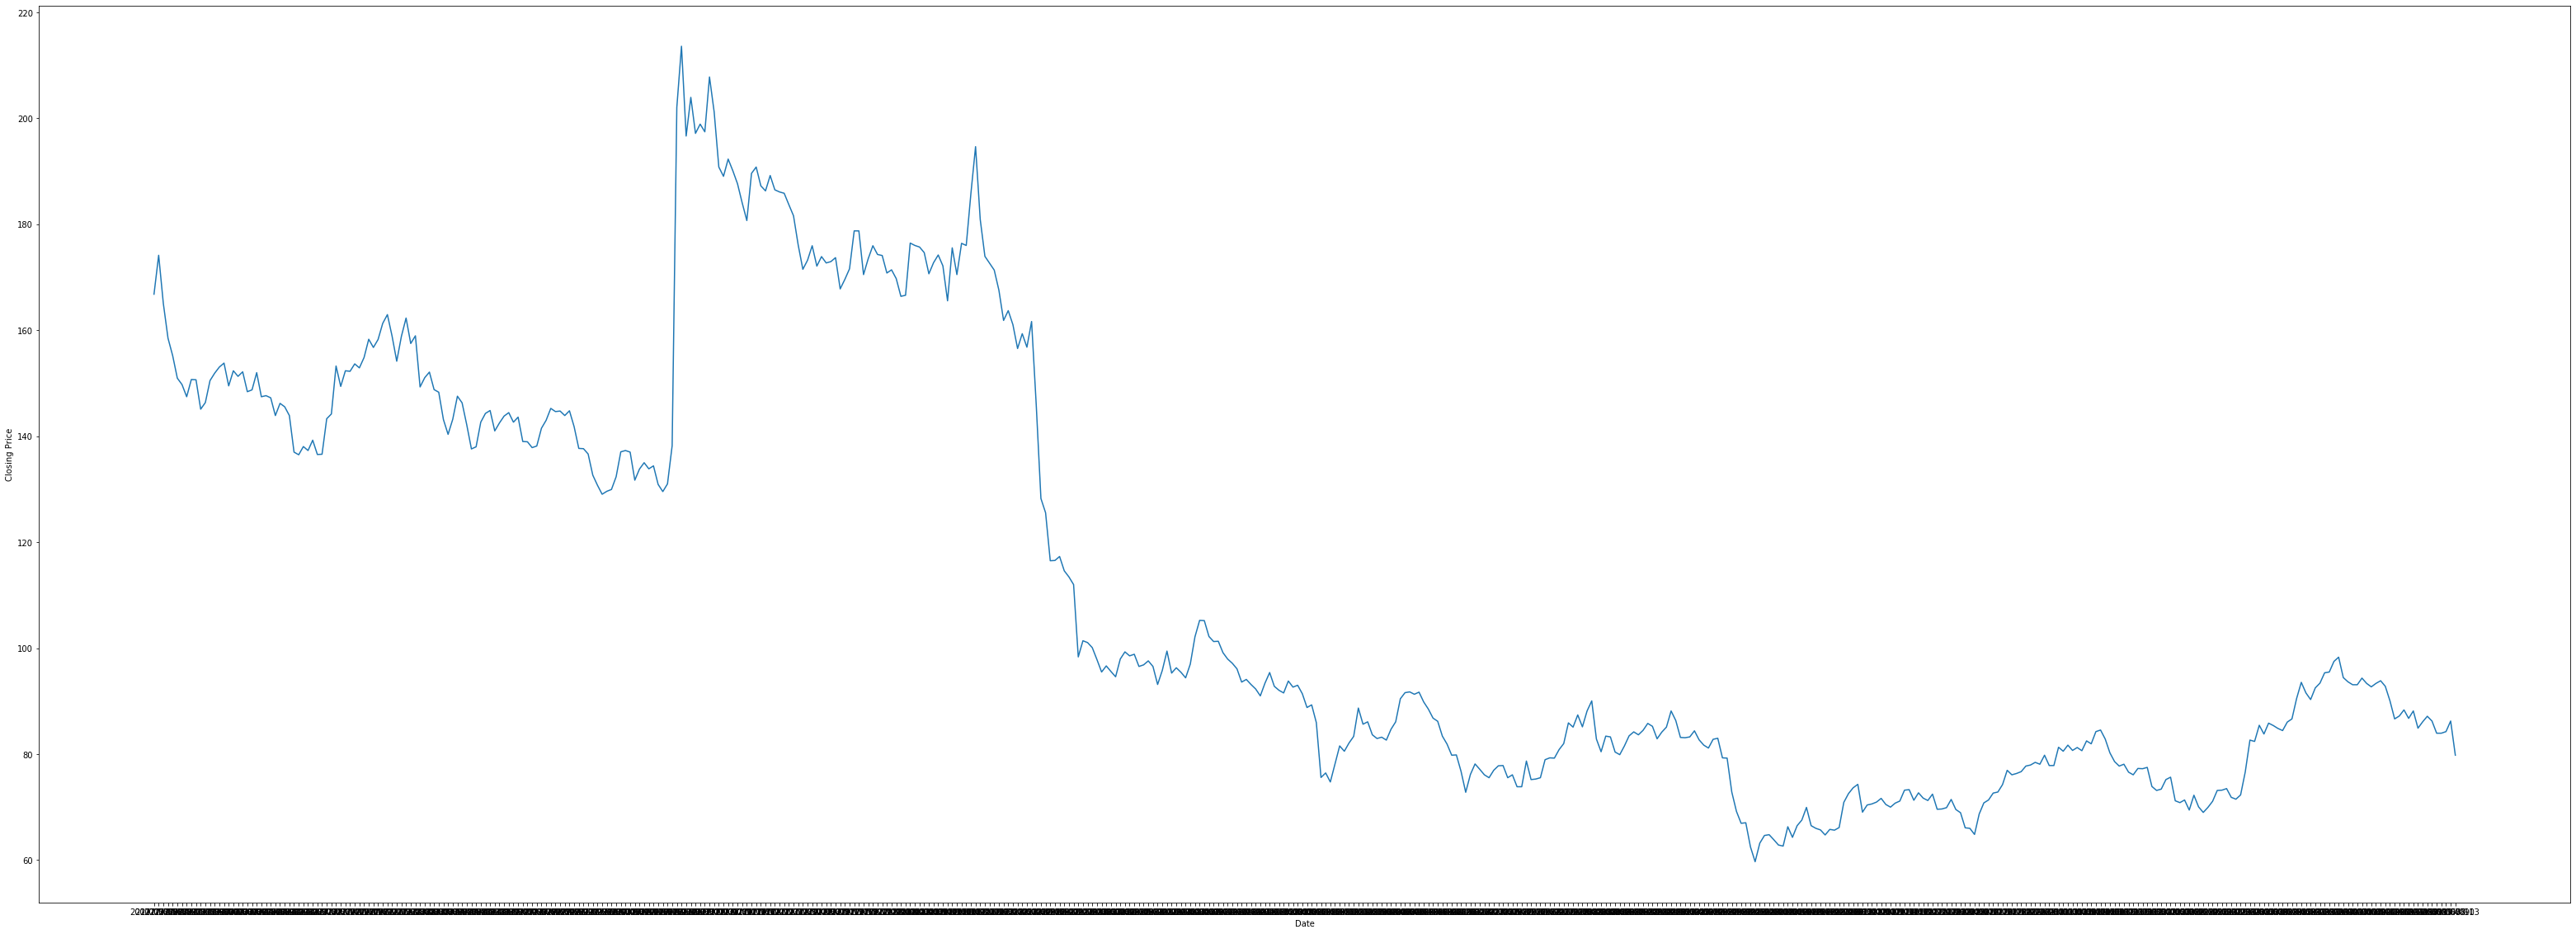

In [36]:
plt.figure(figsize=(55,20))
plt.plot(df.index,df['Close Price'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

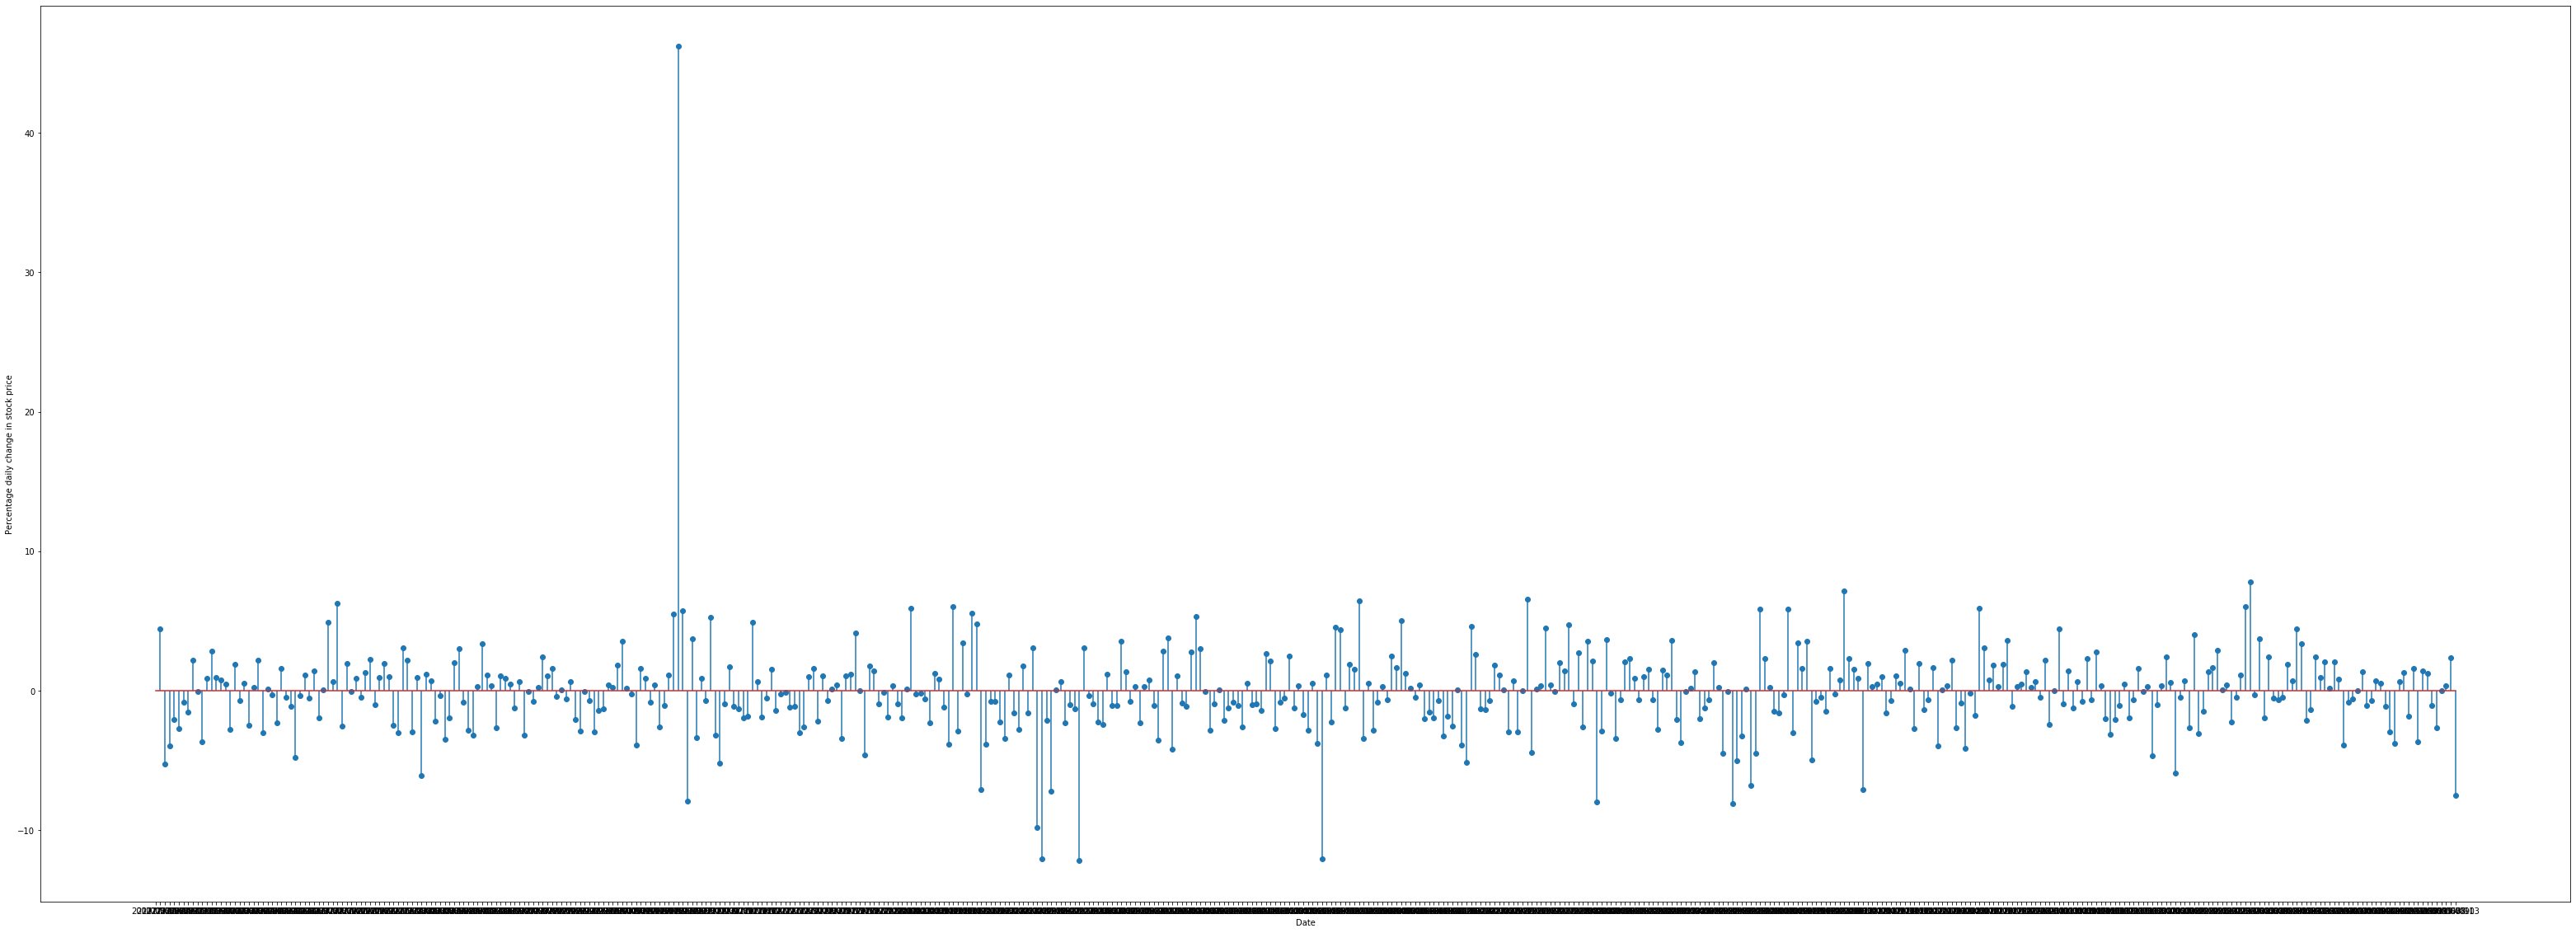

In [37]:
x=df.index
y=df['Day_Perc_Change']
plt.figure(figsize=(55,20))
plt.stem(x,y,use_line_collection=True)
plt.xlabel('Date')
plt.ylabel('Percentage daily change in stock price')
plt.show()

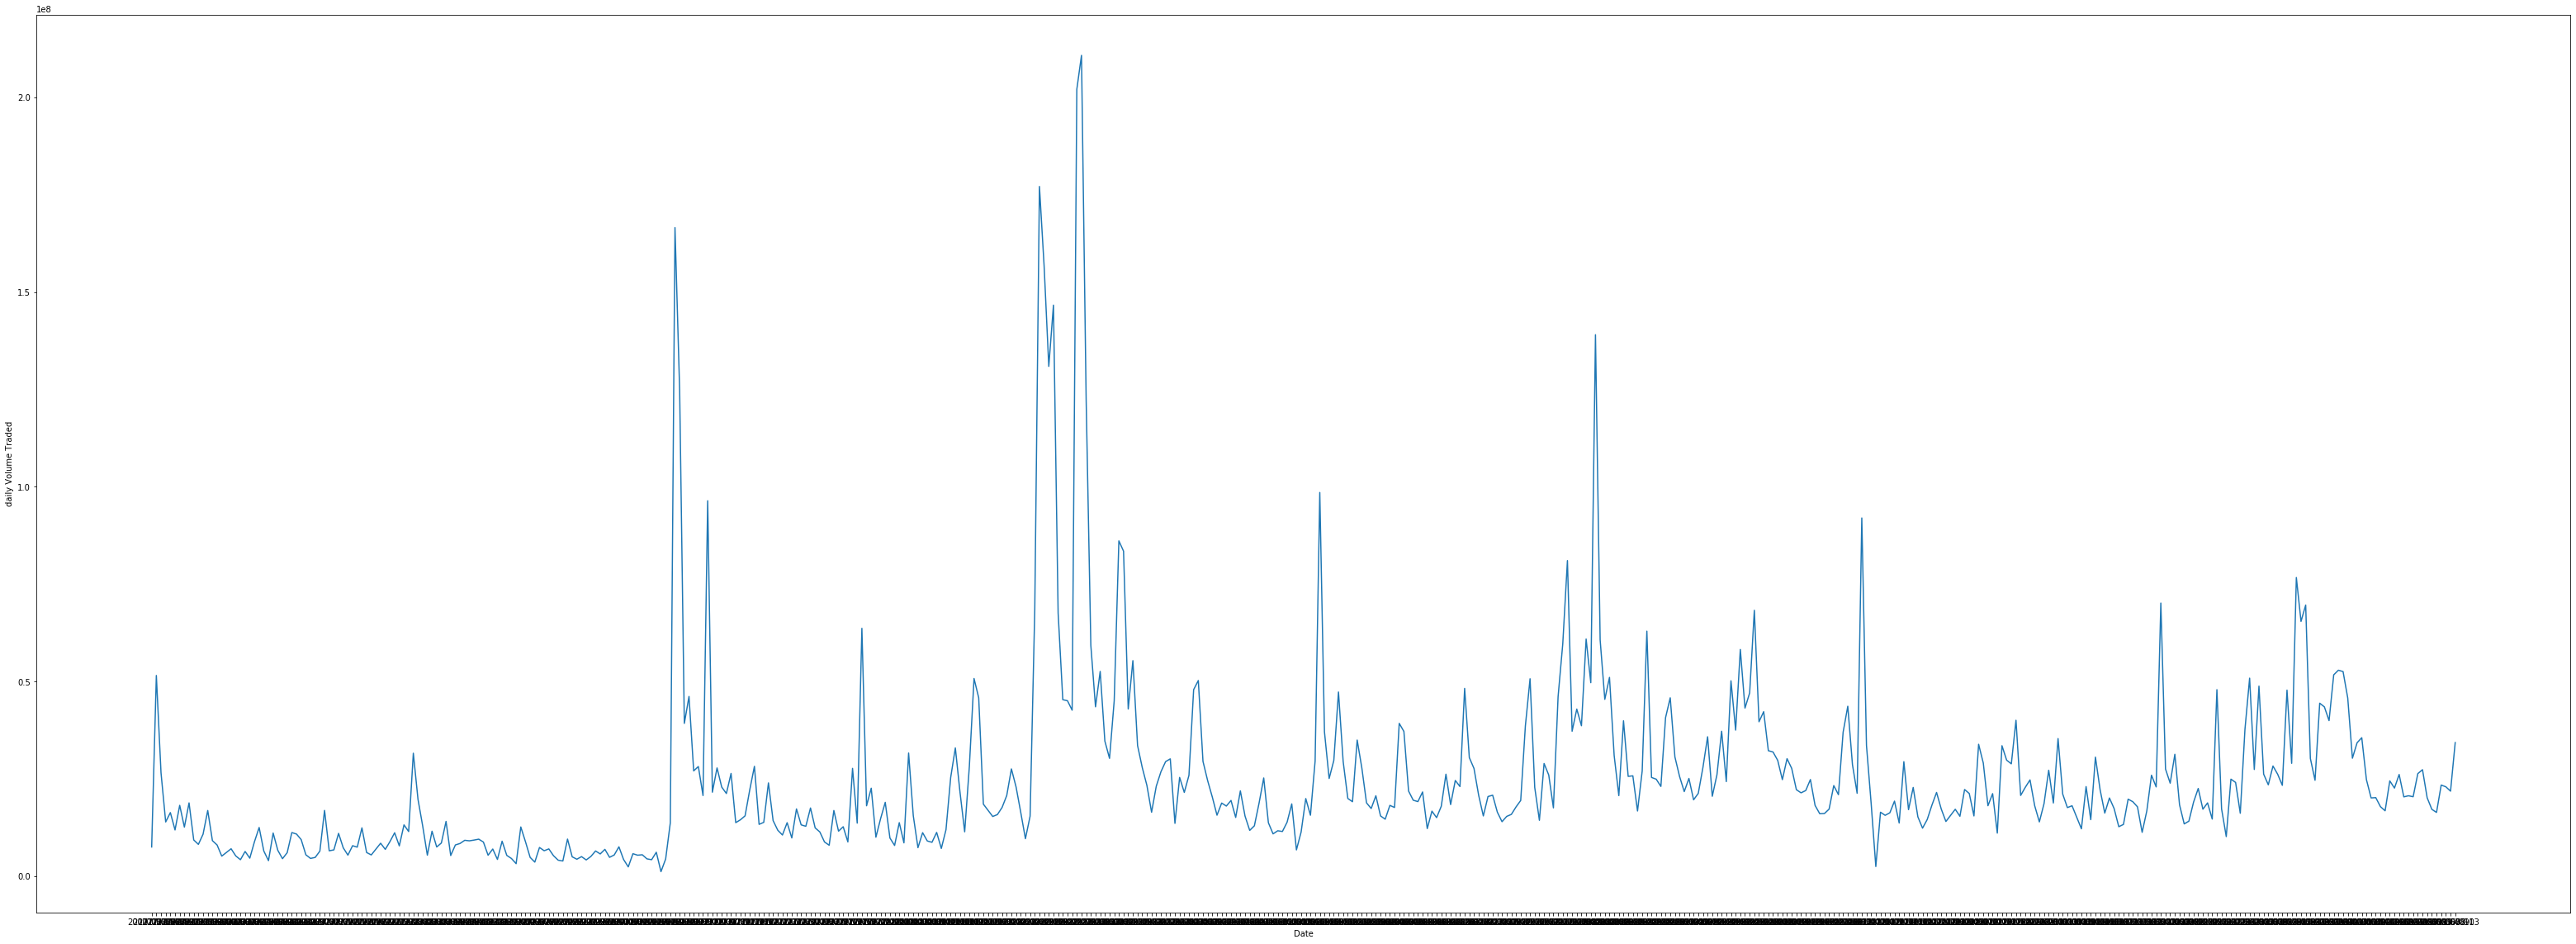

In [38]:
plt.figure(figsize=(55,20))
plt.plot(df.index,df['Total Traded Quantity'])
plt.xlabel("Date")
plt.ylabel("daily Volume Traded")
plt.show()

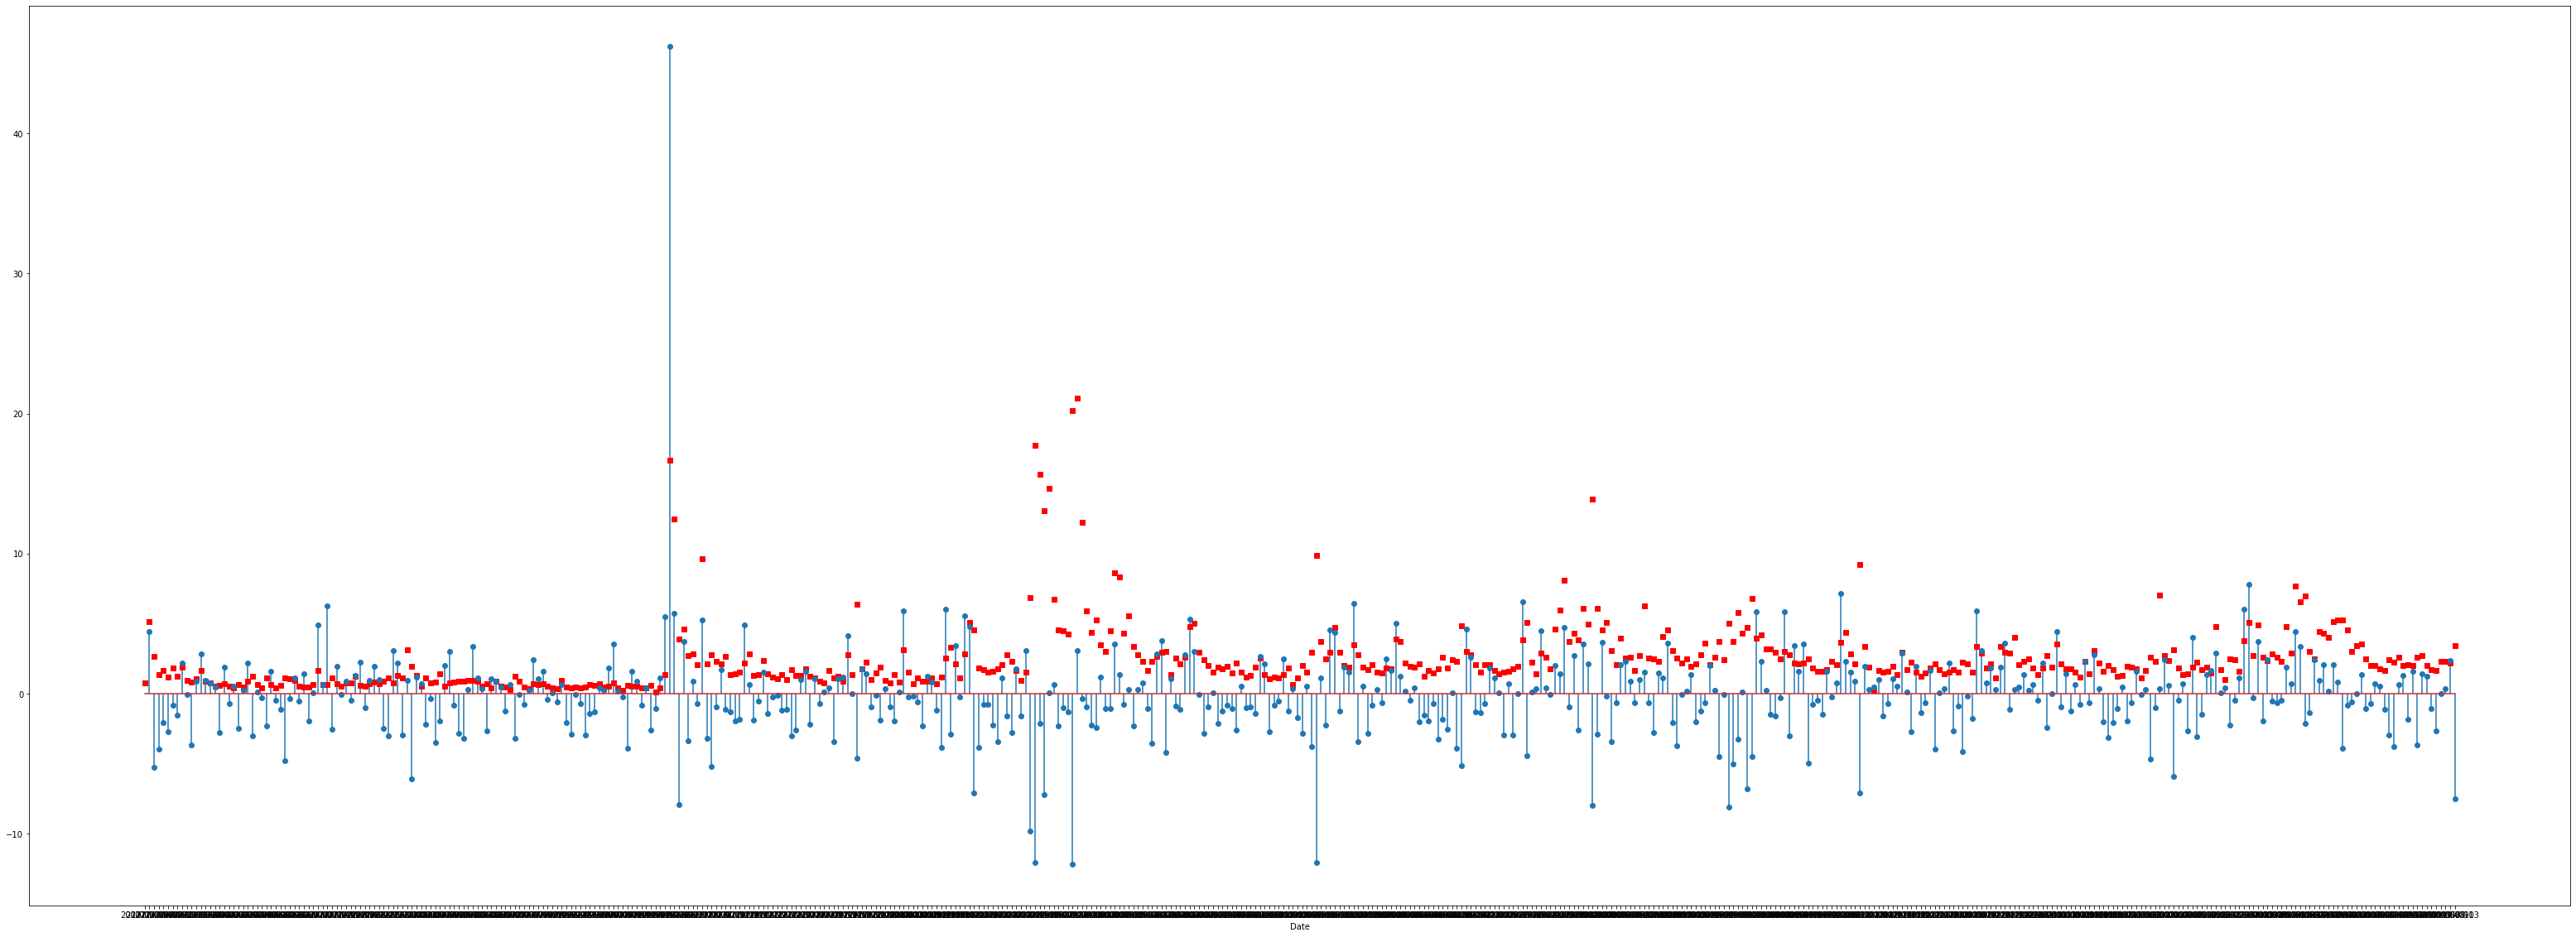

In [39]:
plt.figure(figsize=(55,20))
plt.plot(df.index,df['Total Traded Quantity']/10000000,'rs')
x=df.index
y=df['Day_Perc_Change']
plt.stem(x,y,use_line_collection=True)
plt.xlabel("Date")
plt.show()

In [40]:
df['Trend'].value_counts()

negative               112
positive                98
slight or no change     90
among top gainers       48
slight negative         48
among top losers        44
slight positive         39
bear drop               11
ball run                 3
Name: Trend, dtype: int64

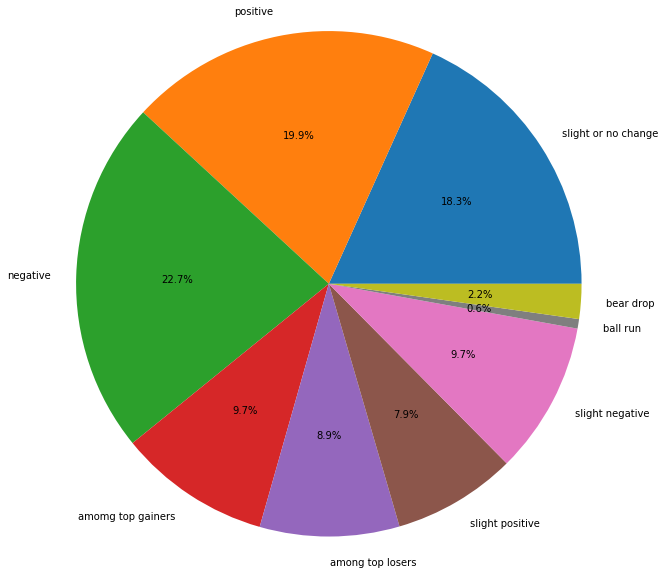

In [41]:
my_labels='slight or no change','positive','negative','amomg top gainers','among top losers','slight positive','slight negative','ball run','bear drop'
data=[90,98,112,48,44,39,48,3,11]
plt.figure(figsize=(10,10))
plt.pie(data,labels=my_labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [42]:
df_trend=df.groupby('Trend')
mean_traded_by_trend=[]
median_traded_by_trend=[]
trends=[]
for trend,df_t in df_trend:
    mean_traded_by_trend.append(df_t['Total Traded Quantity'].mean())
    median_traded_by_trend.append(df_t['Total Traded Quantity'].median())
    trends.append(trend)

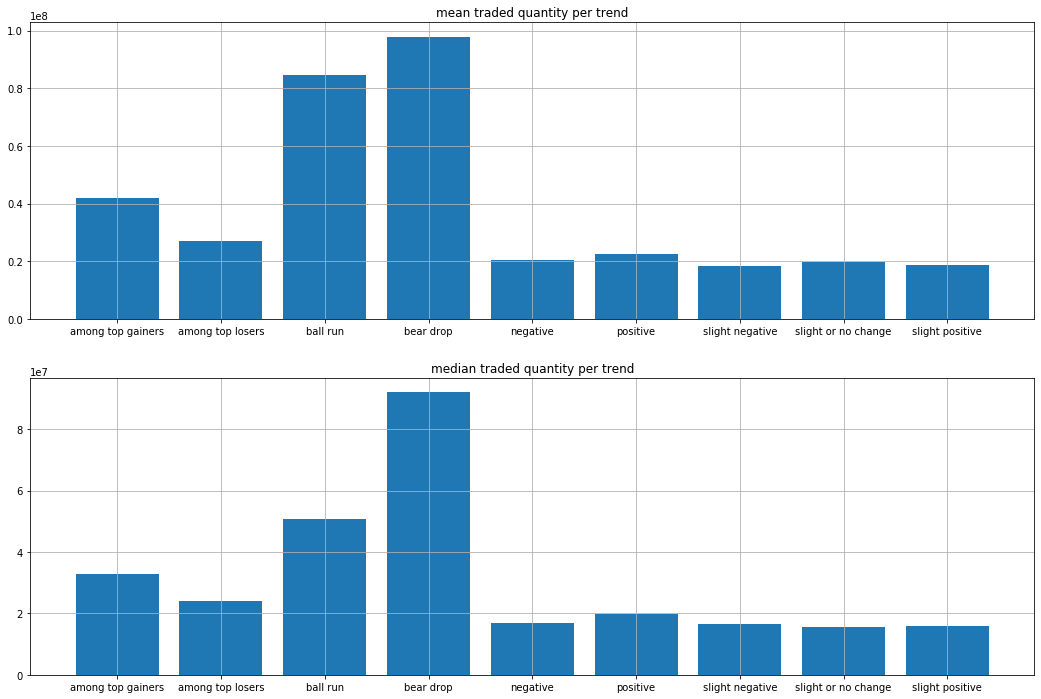

In [43]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
plt.grid()
plt.bar(trends,mean_traded_by_trend)
plt.title('mean traded quantity per trend')
plt.subplot(2,1,2)
plt.grid()
plt.bar(trends,median_traded_by_trend)
plt.title('median traded quantity per trend')
plt.show()

C:\Users\aditya raj\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aditya raj\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


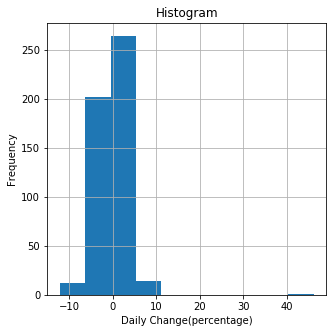

In [44]:
plt.figure(figsize=(5,5))
plt.grid()
plt.hist(df['Day_Perc_Change'])
plt.xlabel("Daily Change(percentage)")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [45]:
ashoka=pd.read_csv('ASHOKA.csv')
bajaj=pd.read_csv('BAJAJELEC.csv')
fortis=pd.read_csv('FORTIS.csv')
bombaydye=pd.read_csv('BOMDYEING.csv')
century=pd.read_csv('CENTURYPLY.csv')

In [46]:
ashoka=ashoka['Close Price']
bajaj=bajaj['Close Price']
fortis=fortis['Close Price']
bombaydye=bombaydye['Close Price']
century=century['Close Price']

In [47]:
ashoka=ashoka.pct_change()*100
bajaj=bajaj.pct_change()*100
fortis=fortis.pct_change()*100
bombaydye=bombaydye.pct_change()*100
century=century.pct_change()*100

In [48]:
ashoka.loc[0]=0
bajaj.loc[0]=0
fortis.loc[0]=0
bombaydye.loc[0]=0
century.loc[0]=0

In [49]:
data=pd.DataFrame()
data['ashoka']=ashoka
data['bajaj']=bajaj
data['fortis']=fortis
data['bombaydye']=bombaydye
data['century']=century

In [50]:
print(data)

       ashoka     bajaj    fortis  bombaydye   century
0    0.000000  0.000000  0.000000   0.000000  0.000000
1   -0.532284  1.714788  1.291108   1.459854 -0.206263
2    0.977199  0.821326 -0.962001  -1.378897 -0.469748
3   -3.387097 -4.501929 -4.395338  -4.012158 -1.699075
4   -1.621751  0.628554  3.403607  -2.279924 -2.419819
..        ...       ...       ...        ...       ...
489  1.766480 -0.017926 -1.016334  -6.505004 -3.432968
490 -2.243861 -4.177499 -0.843418  -1.729107 -1.133926
491 -0.129926 -0.486481 -1.183432  -1.340595 -0.495970
492  1.864701  1.701608 -0.449102  -0.594480  0.000000
493 -0.255428  0.120170 -0.827068  -6.151217  1.464174

[494 rows x 5 columns]


                      Analysis of correlation between different stock's closing price           


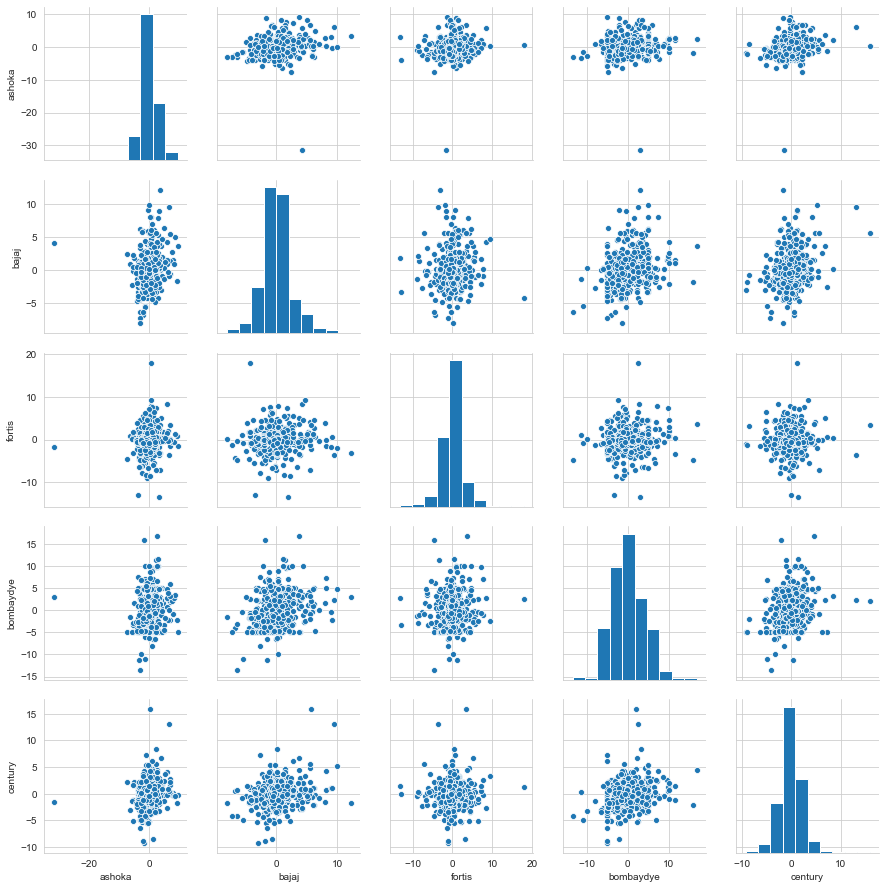

In [51]:
print("                      Analysis of correlation between different stock's closing price           ")
sns.set_style("whitegrid")
sns.pairplot(data)
plt.show()

In [52]:
rolling_average_ashoka=ashoka.rolling(7).std()
print(rolling_average_ashoka)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
489    1.635047
490    1.628739
491    1.714842
492    1.999943
493    1.787522
Name: Close Price, Length: 494, dtype: float64


In [53]:
rolling_average_bajaj=bajaj.rolling(7).std()
print(rolling_average_bajaj)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
489    0.749832
490    1.562024
491    1.497387
492    1.769733
493    1.792197
Name: Close Price, Length: 494, dtype: float64


In [54]:
nifty_index=pd.read_csv('Nifty50.csv')
print(nifty_index)

            Date      Open      High       Low     Close  Shares Traded  \
0    15-May-2017   9433.55   9449.25   9423.10   9445.40      145163953   
1    16-May-2017   9461.00   9517.20   9456.35   9512.25      171709433   
2    17-May-2017   9517.60   9532.60   9486.10   9525.75      211856040   
3    18-May-2017   9453.20   9489.10   9418.10   9429.45      199340647   
4    19-May-2017   9469.90   9505.75   9390.75   9427.90      259861396   
..           ...       ...       ...       ...       ...            ...   
489  07-May-2019  11651.50  11657.05  11484.45  11497.90      337495624   
490  08-May-2019  11478.70  11479.10  11346.95  11359.45      372826025   
491  09-May-2019  11322.40  11357.60  11255.05  11301.80      373028059   
492  10-May-2019  11314.15  11345.80  11251.05  11278.90      387323416   
493  13-May-2019  11258.70  11300.20  11125.60  11148.20      357586433   

     Turnover (Rs. Cr)  
0              7790.97  
1              9209.89  
2             10726.23  

In [55]:
nifty_index=nifty_index['Close']
nifty_index=nifty_index.pct_change()
nifty_index.loc[0]=0
print(nifty_index)

0      0.000000
1      0.007078
2      0.001419
3     -0.010109
4     -0.000164
         ...   
489   -0.008652
490   -0.012041
491   -0.005075
492   -0.002026
493   -0.011588
Name: Close, Length: 494, dtype: float64


In [56]:
nifty_index=nifty_index.rolling(7).std()
print(nifty_index)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
489    0.006664
490    0.007408
491    0.004605
492    0.004363
493    0.004474
Name: Close, Length: 494, dtype: float64


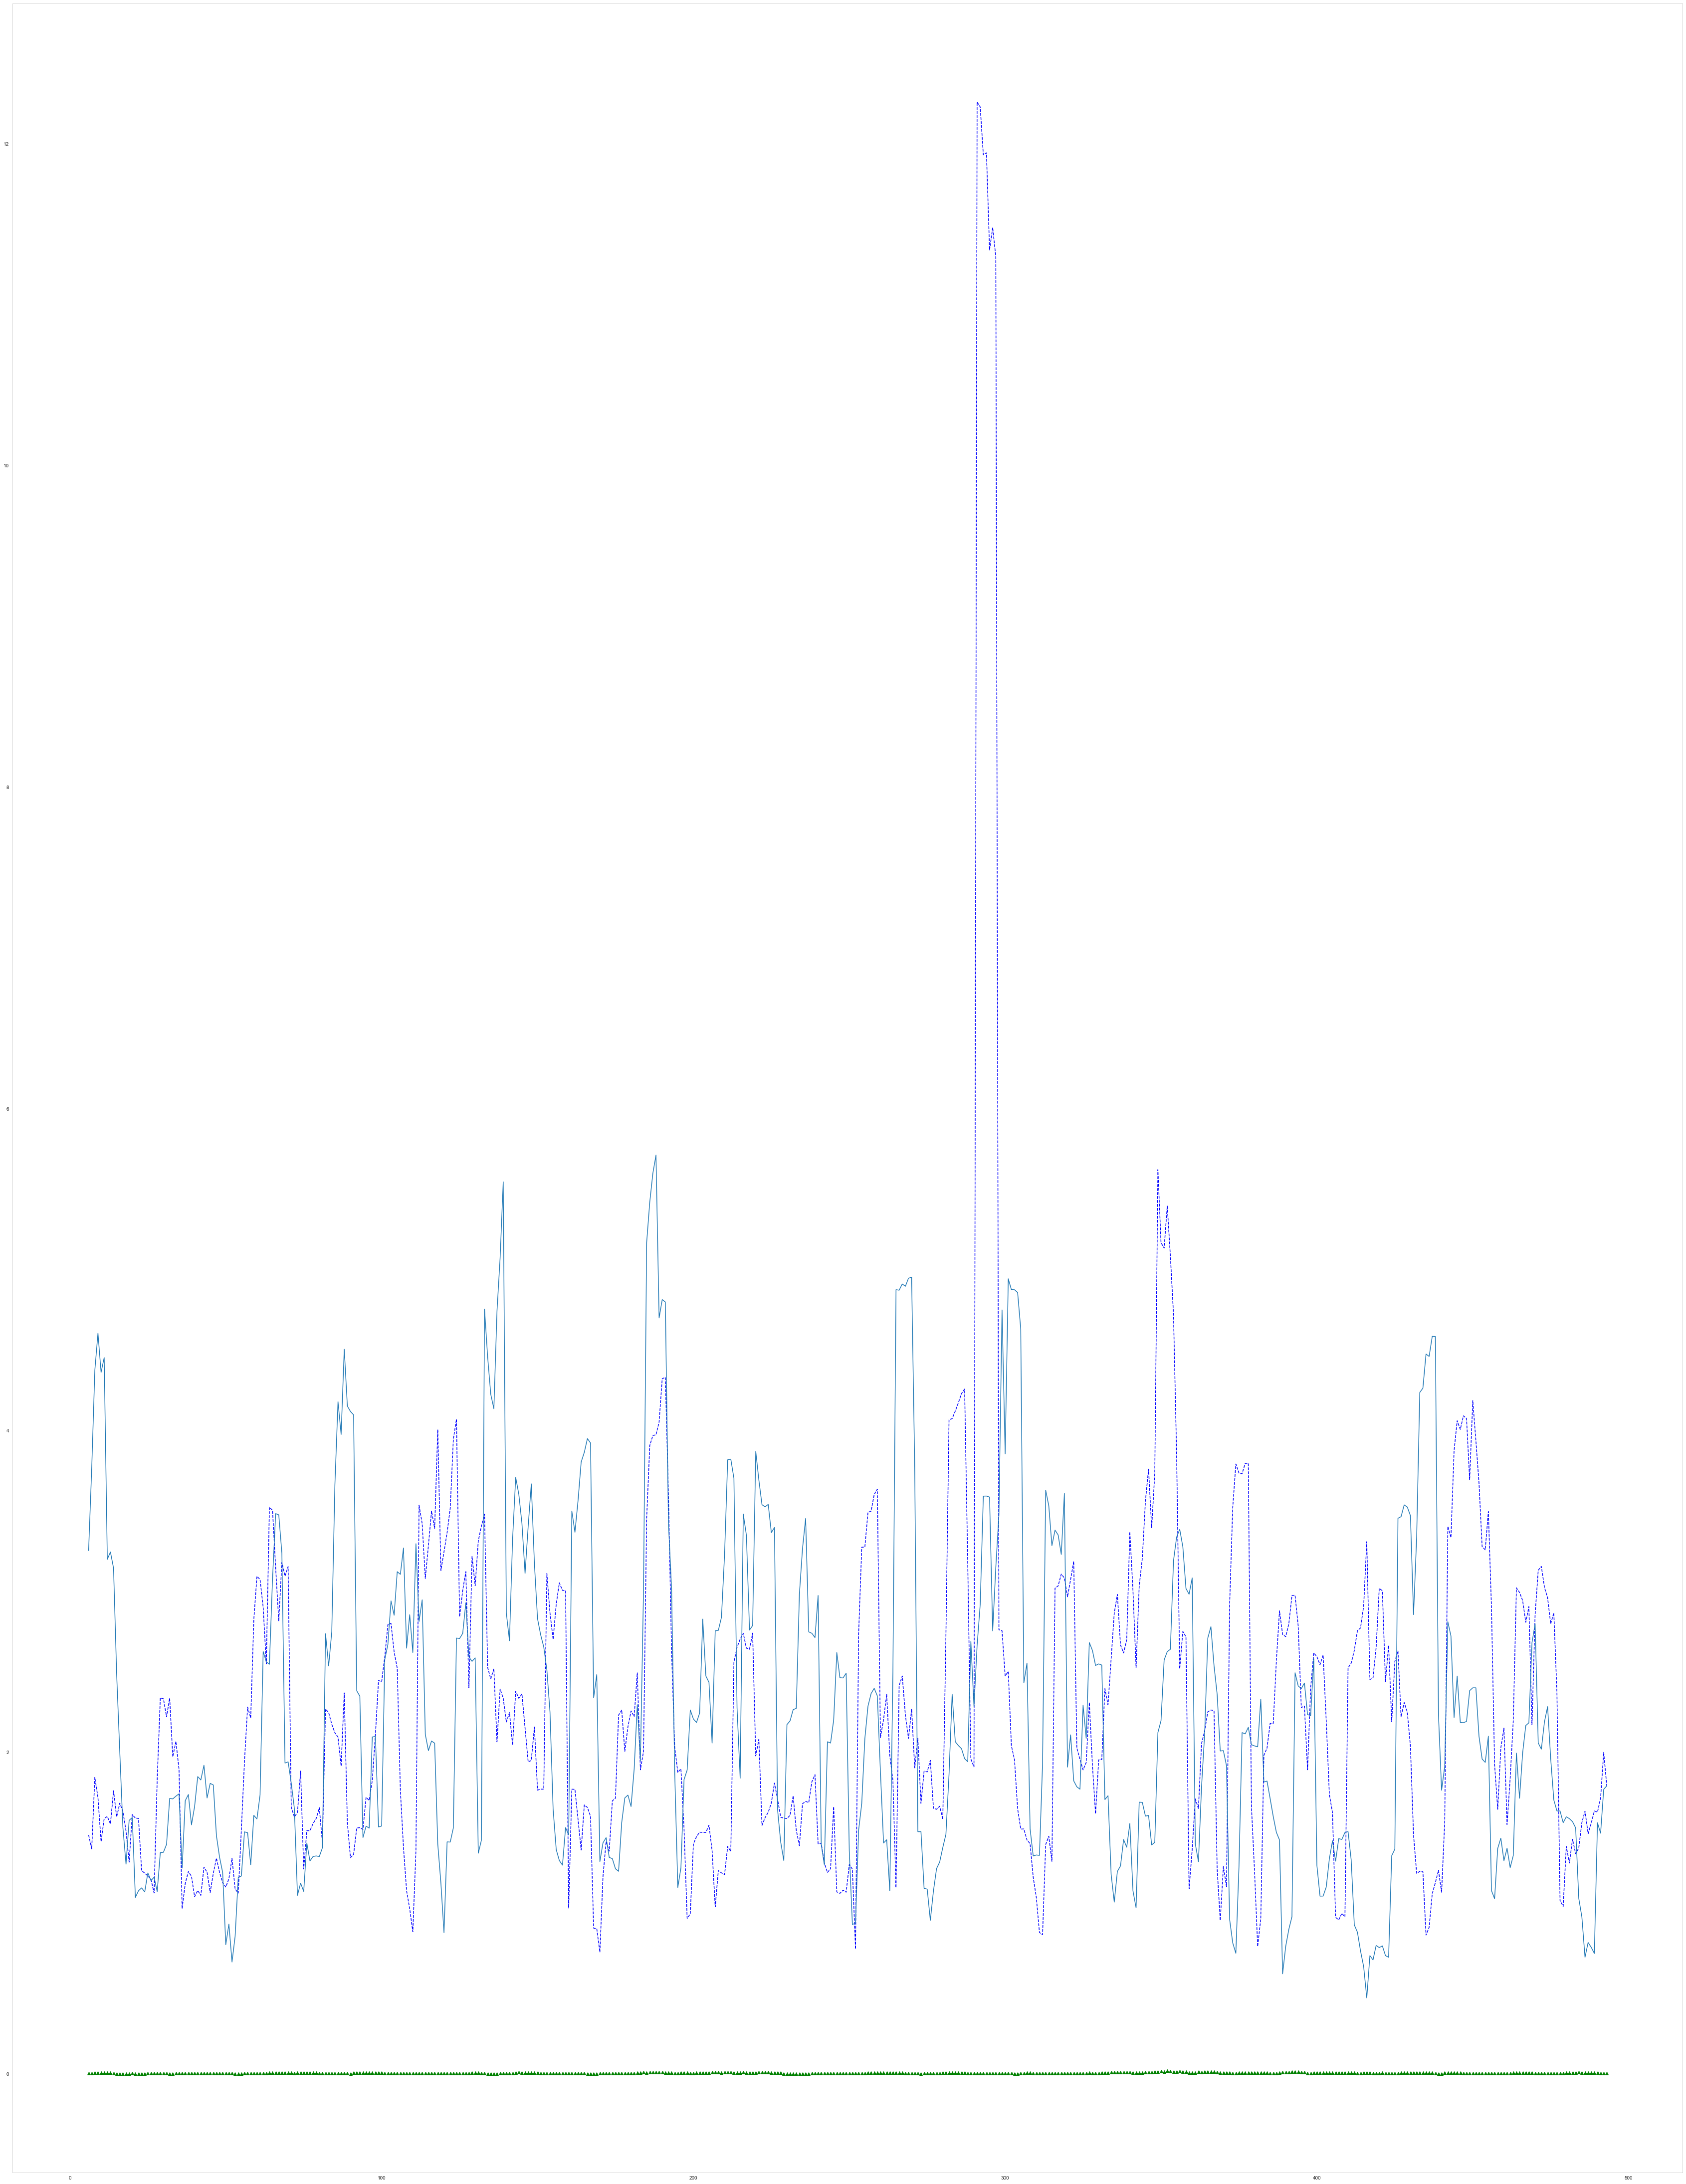

In [57]:
plt.figure(figsize=(60,80))
plt.plot(rolling_average_ashoka,'b--',label='ashoka')
plt.plot(rolling_average_bajaj,label='bajaj')
plt.plot(nifty_index,'g^',label='nifty')
plt.grid()
plt.show()

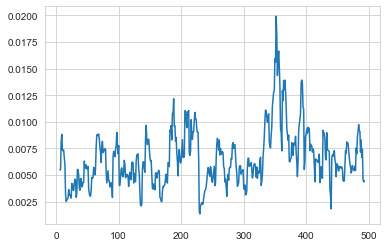

In [58]:
plt.close()
plt.plot(nifty_index)
plt.show()

In [59]:
moving_avg_21=df['Close Price'].rolling(21).mean()
moving_avg_34=df['Close Price'].rolling(34).mean()
avg_price=df['Average Price']

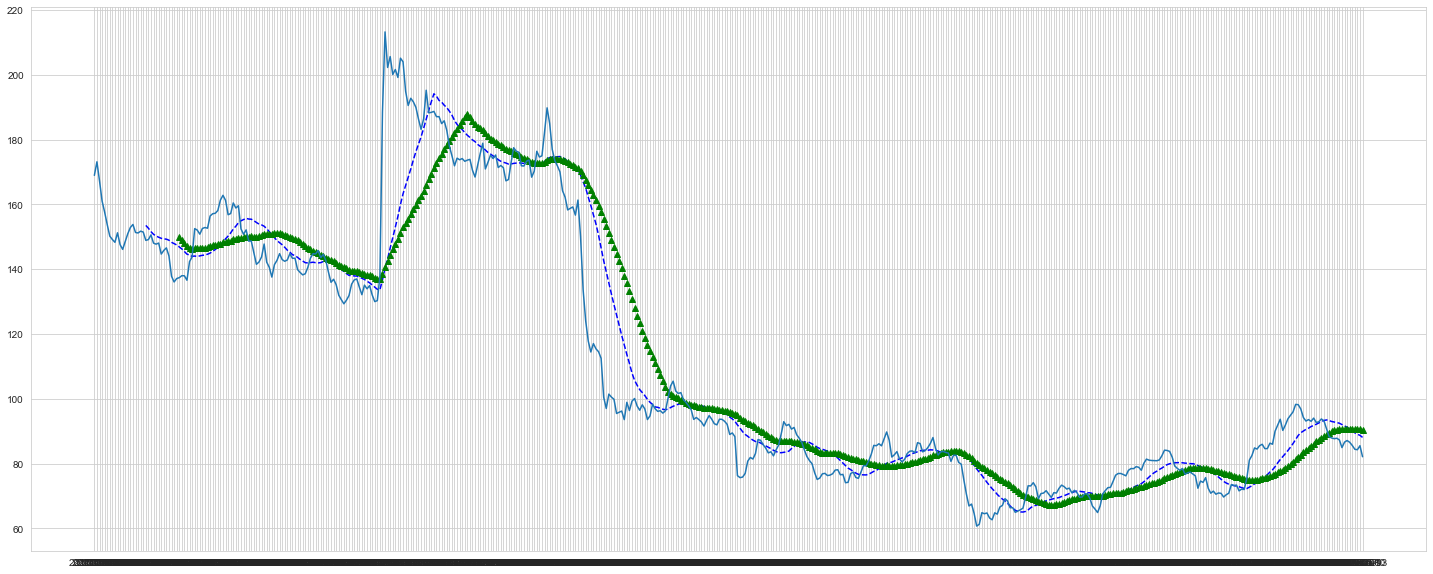

In [60]:
plt.figure(figsize=(25,10))
plt.plot(moving_avg_21,'b--',label='21')
plt.plot(moving_avg_34,'g^',label='34')
plt.plot(avg_price,label='avg')
plt.show()

In [61]:
rolling_avg=df['Close Price'].rolling(14).mean()
upper_band=df['Close Price'].rolling(14).mean()+2*df['Close Price'].std()
lower_band=df['Close Price'].rolling(14).mean()-2*df['Close Price'].std()
avg_price =df['Average Price']

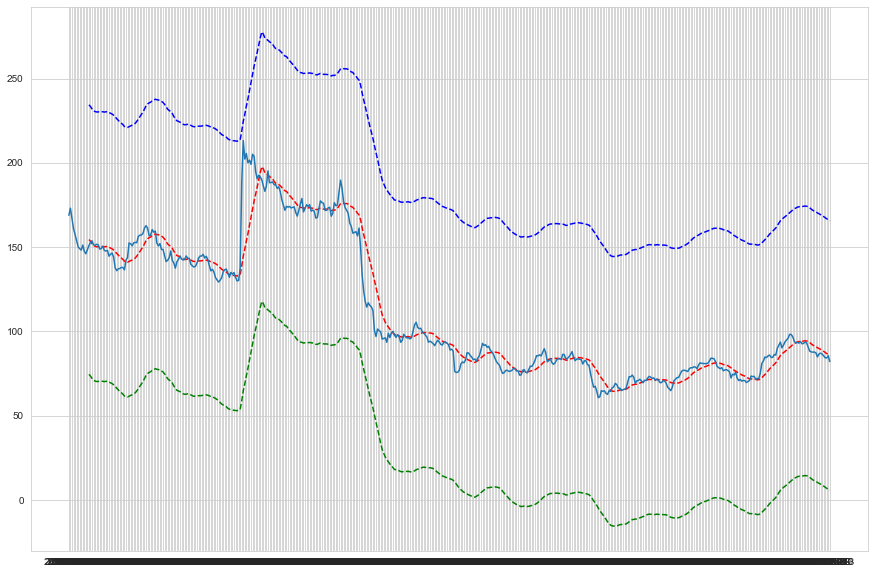

In [62]:
plt.figure(figsize=(15,10))
plt.plot(rolling_avg,'r--',label='rolling avg')
plt.plot(upper_band,'b--',label='upper band')
plt.plot(lower_band,'g--',label='lower band')
plt.plot(avg_price,label='avg price')
plt.show()

In [63]:
df=pd.read_csv('GOLD.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [64]:
price=[]
high=[]
low=[]
open=[]
for i in df['Price']:
    price.append(i)
for i in df['High']:
    high.append(i)
for i in df['Low']:
    low.append(i)
for i in df['Open']:
    open.append(i)

In [65]:
x=np.array([[price],[open],[high],[low]])
x=x.T
x=x.reshape(512,4)
print(x)
print("*****************************************************************************************")
print(x.shape)

[[28060 28400 28482 28025]
 [28184 28136 28382 28135]
 [28119 28145 28255 28097]
 ...
 [31563 31604 31657 31503]
 [31203 31420 31425 31160]
 [31341 31250 31500 31163]]
*****************************************************************************************
(512, 4)


In [66]:
xa=x[:411]
xa

array([[28060, 28400, 28482, 28025],
       [28184, 28136, 28382, 28135],
       [28119, 28145, 28255, 28097],
       ...,
       [31005, 31039, 31196, 30974],
       [31440, 31011, 31480, 30941],
       [31895, 31459, 31966, 31420]])

In [67]:
y=[]
for i in df['Pred']:
    y.append(i)
y=y[:411]
y

[738.0,
 -146.0,
 30.0,
 357.0,
 124.0,
 149.0,
 167.0,
 22.0,
 34.0,
 420.0,
 234.0,
 345.0,
 265.0,
 138.0,
 378.0,
 413.0,
 214.0,
 121.0,
 491.0,
 397.0,
 404.0,
 222.0,
 -3.0,
 259.0,
 344.0,
 906.0,
 526.0,
 174.0,
 685.0,
 329.0,
 592.0,
 205.0,
 292.0,
 150.0,
 420.0,
 -42.0,
 -82.0,
 262.0,
 23.0,
 173.0,
 550.0,
 928.0,
 804.0,
 -39.0,
 927.0,
 205.0,
 771.0,
 818.0,
 420.0,
 142.0,
 199.0,
 432.0,
 71.0,
 101.0,
 465.0,
 350.0,
 322.0,
 121.0,
 361.0,
 436.0,
 202.0,
 551.0,
 224.0,
 486.0,
 247.0,
 398.0,
 316.0,
 117.0,
 333.0,
 364.0,
 242.0,
 329.0,
 340.0,
 804.0,
 512.0,
 -4.0,
 230.0,
 602.0,
 129.0,
 168.0,
 1177.0,
 333.0,
 73.0,
 740.0,
 286.0,
 12.0,
 1459.0,
 1158.0,
 258.0,
 336.0,
 238.0,
 706.0,
 339.0,
 384.0,
 374.0,
 471.0,
 612.0,
 45.0,
 83.0,
 548.0,
 85.0,
 620.0,
 754.0,
 409.0,
 372.0,
 483.0,
 196.0,
 554.0,
 318.0,
 359.0,
 82.0,
 38.0,
 147.0,
 79.0,
 393.0,
 -13.0,
 432.0,
 333.0,
 67.0,
 164.0,
 498.0,
 228.0,
 574.0,
 310.0,
 238.0,
 302.0,
 811

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
tuned_parameters={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
x_train,x_test,y_train,y_test=train_test_split(xa,y,test_size=0.3,random_state=101)
model=GridSearchCV(LinearRegression(),tuned_parameters,cv=None)
model.fit(x_train,y_train)
print(model.best_estimator_)
print(model.best_params_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
{'copy_X': True, 'fit_intercept': True, 'normalize': True}


C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [69]:
modelLR=model.best_estimator_
print(modelLR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [70]:
modelLR.fit(x_train,y_train)
accuracy_pred=modelLR.score(x_test,y_test)*100
accuracy_pred

100.0

In [71]:
yn=[]
for i in df['new']:
    yn.append(i)
yn=yn[:512]
yn

[117.57074041034866,
 295.430175937443,
 132.12371427554538,
 101.29806419293527,
 112.15331832314767,
 182.42708892467274,
 141.25513668036362,
 120.06900985855101,
 218.40164139161428,
 919.3763578274776,
 475.38909320164015,
 222.89530685920545,
 425.7384836180353,
 194.44954766875526,
 69.28900523560151,
 39.225874125873816,
 346.1584013391912,
 152.28142465373094,
 63.23430962343264,
 547.1156210702793,
 37.212628865978324,
 598.1045676429568,
 201.30676536409007,
 546.5669153888266,
 112.39406345957106,
 125.33370177196049,
 110.61194340407744,
 132.2745138816681,
 161.0781581972078,
 280.1149225748195,
 46.40153631284921,
 37.06601398601561,
 13.060751932538553,
 115.21287825475157,
 128.55712424743982,
 178.20119920053185,
 238.33822912295363,
 301.0087744126795,
 243.4937150100341,
 115.16780858016136,
 175.88054968287545,
 128.51941919909223,
 27.36257833482523,
 300.66286307053815,
 243.29340994792443,
 69.14343139696211,
 97.80665849967407,
 274.12671976828284,
 294.3848458

In [72]:
xb=np.array([[price],[open],[high],[low]])
xb.T
xb=xb.reshape(512,4)
xb.shape
xb

array([[28060, 28184, 28119, 27981],
       [28007, 28022, 28019, 28008],
       [28109, 28614, 28710, 28634],
       ...,
       [31453, 31393, 31355, 31497],
       [31401, 31450, 31641, 31705],
       [31597, 31503, 31160, 31163]])

In [73]:
tuned_parameters={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
x_train,x_test,y_train,y_test=train_test_split(xb,yn,test_size=0.3,random_state=101)
model=GridSearchCV(LinearRegression(),tuned_parameters,cv=None)
model.fit(x_train,y_train)
print(model.best_estimator_)
print(model.best_params_)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)
{'copy_X': True, 'fit_intercept': False, 'normalize': True}


C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [74]:
modelPR=model.best_estimator_
modelPR.fit(x_train,y_train)
accuracy_new=modelPR.score(x_test,y_test)*100
accuracy_new

-3.1573098625637064

In [75]:
print("Pred column has accuracy of 100 percent with linear regression while new column has -3.157 percent so definitely the pred      column has linear combination with OHLC while new has polynomial combination.")

Pred column has accuracy of 100 percent with linear regression while new column has -3.157 percent so definitely the pred      column has linear combination with OHLC while new has polynomial combination.


In [76]:
#since now pred column is linear combination of OHLC , i will complete the pred column with same linear model
Y=modelLR.predict(x[411:])
Y

array([ 852.,  422.,  530.,  144.,  415., 1103.,  411.,  613.,    5.,
        547.,  -27.,  368.,  263.,  615.,  479.,  -82.,  489., 2890.,
        340.,  274.,  469.,  487.,  -48.,  364.,    7.,  277.,  283.,
        550.,  110.,  413.,  146.,  241.,  406.,  119.,  405.,  303.,
        154.,  679., 2111.,  860.,  -37.,  615.,  468.,  716.,  410.,
        251.,  466.,  254.,  109.,  470.,  241.,  776.,  471.,  555.,
       -139.,  224.,  603., 3024.,  331., 2895.,  476.,  589.,  233.,
        670.,  152.,   32.,  960.,  359.,  595.,  439.,  586.,   93.,
        741.,  466.,  502.,  159.,  833.,  378.,    6.,  694.,  518.,
        554.,  517.,  202.,  338.,  489., 1070.,   -8.,  579.,  468.,
        223.,  264., -132.,  350.,  359.,  446.,  535.,  438.,  269.,
        601.,  280.])

In [77]:
df['Pred'][411:]=Y
print(df)

             Date  Price   Open   High    Low    Vol. Change %   Pred  \
0    May 04, 2017  28060  28400  28482  28025   0.08K   -1.79%  738.0   
1    May 05, 2017  28184  28136  28382  28135   0.06K    0.44% -146.0   
2    May 08, 2017  28119  28145  28255  28097   7.85K   -0.23%   30.0   
3    May 09, 2017  27981  28125  28192  27947  10.10K   -0.49%  357.0   
4    May 10, 2017  28007  28060  28146  27981   9.28K    0.09%  124.0   
..            ...    ...    ...    ...    ...     ...      ...    ...   
507  Apr 26, 2019  31868  31851  31934  31705   9.67K    0.08%  535.0   
508  Apr 30, 2019  31625  31800  31824  31597   6.44K   -0.76%  438.0   
509  May 01, 2019  31563  31604  31657  31503   1.55K   -0.20%  269.0   
510  May 02, 2019  31203  31420  31425  31160   0.48K   -1.14%  601.0   
511  May 03, 2019  31341  31250  31500  31163   0.08K    0.44%  280.0   

            new  
0    117.570740  
1    295.430176  
2    132.123714  
3    101.298064  
4    112.153318  
..          ...

C:\Users\aditya raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
pnb=pd.read_csv('PNB.csv')
nifty=pd.read_csv('Nifty50.csv')

In [79]:
print(pnb)

    Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0      PNB     EQ  15-May-2017      169.15      169.95      171.30     166.20   
1      PNB     EQ  16-May-2017      166.80      167.35      178.00     164.80   
2      PNB     EQ  17-May-2017      174.15      173.00      173.10     164.30   
3      PNB     EQ  18-May-2017      165.05      163.40      164.40     157.90   
4      PNB     EQ  19-May-2017      158.50      159.50      162.25     154.10   
..     ...    ...          ...         ...         ...         ...        ...   
489    PNB     EQ  07-May-2019       86.25       86.70       87.15      83.40   
490    PNB     EQ  08-May-2019       83.95       83.75       85.40      83.25   
491    PNB     EQ  09-May-2019       83.95       84.10       85.35      82.80   
492    PNB     EQ  10-May-2019       84.25       85.00       87.25      84.40   
493    PNB     EQ  13-May-2019       86.25       86.15       86.20      79.05   

     Last Price  Close Pric

In [80]:
print(nifty)

            Date      Open      High       Low     Close  Shares Traded  \
0    15-May-2017   9433.55   9449.25   9423.10   9445.40      145163953   
1    16-May-2017   9461.00   9517.20   9456.35   9512.25      171709433   
2    17-May-2017   9517.60   9532.60   9486.10   9525.75      211856040   
3    18-May-2017   9453.20   9489.10   9418.10   9429.45      199340647   
4    19-May-2017   9469.90   9505.75   9390.75   9427.90      259861396   
..           ...       ...       ...       ...       ...            ...   
489  07-May-2019  11651.50  11657.05  11484.45  11497.90      337495624   
490  08-May-2019  11478.70  11479.10  11346.95  11359.45      372826025   
491  09-May-2019  11322.40  11357.60  11255.05  11301.80      373028059   
492  10-May-2019  11314.15  11345.80  11251.05  11278.90      387323416   
493  13-May-2019  11258.70  11300.20  11125.60  11148.20      357586433   

     Turnover (Rs. Cr)  
0              7790.97  
1              9209.89  
2             10726.23  

In [81]:
pnb=pnb['Close Price']
nifty=nifty['Close']
print(pnb)
print("**********************************************************************************")
print(nifty)

0      166.80
1      174.15
2      165.05
3      158.50
4      155.20
        ...  
489     83.95
490     83.95
491     84.25
492     86.25
493     79.80
Name: Close Price, Length: 494, dtype: float64
**********************************************************************************
0       9445.40
1       9512.25
2       9525.75
3       9429.45
4       9427.90
         ...   
489    11497.90
490    11359.45
491    11301.80
492    11278.90
493    11148.20
Name: Close, Length: 494, dtype: float64


In [82]:
pnb=pnb.pct_change(1)
nifty=nifty.pct_change(1)
X=np.array([pnb])
Y=nifty
X.reshape(494,1)
X=X.T
print(X.shape)

(494, 1)


In [83]:
X[0]=0
Y[0]=0
print(X)
print('************************************************************************')
print(Y)

[[ 0.00000000e+00]
 [ 4.40647482e-02]
 [-5.22538042e-02]
 [-3.96849440e-02]
 [-2.08201893e-02]
 [-2.73840206e-02]
 [-7.94965220e-03]
 [-1.53589316e-02]
 [ 2.20413700e-02]
 [-3.31785003e-04]
 [-3.68403584e-02]
 [ 8.61474845e-03]
 [ 2.83566792e-02]
 [ 9.30232558e-03]
 [ 7.57077024e-03]
 [ 4.90035936e-03]
 [-2.79583875e-02]
 [ 1.90635452e-02]
 [-6.89202494e-03]
 [ 5.61797753e-03]
 [-2.46467302e-02]
 [ 2.35849057e-03]
 [ 2.18487395e-02]
 [-2.99342105e-02]
 [ 1.35639200e-03]
 [-2.70910938e-03]
 [-2.27504244e-02]
 [ 1.59833218e-02]
 [-4.44596443e-03]
 [-1.13363105e-02]
 [-4.79499653e-02]
 [-3.64963504e-03]
 [ 1.13553114e-02]
 [-5.43281420e-03]
 [ 1.42024763e-02]
 [-1.93895871e-02]
 [ 3.66166239e-04]
 [ 4.90483163e-02]
 [ 6.28053036e-03]
 [ 6.27600555e-02]
 [-2.51223491e-02]
 [ 1.97456493e-02]
 [-6.56383328e-04]
 [ 9.19540230e-03]
 [-4.88122356e-03]
 [ 1.27534336e-02]
 [ 2.22796254e-02]
 [-9.79153506e-03]
 [ 9.56937799e-03]
 [ 1.92733017e-02]
 [ 1.02293862e-02]
 [-2.48542498e-02]
 [-2.9893014

In [84]:
import statsmodels.api as sm
X1=sm.add_constant(Y)
model1=sm.OLS(X,Y)
result=model1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.139
Model:                            OLS   Adj. R-squared (uncentered):              0.137
Method:                 Least Squares   F-statistic:                              79.46
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                    9.57e-18
Time:                        03:48:36   Log-Likelihood:                          1002.0
No. Observations:                 494   AIC:                                     -2002.
Df Residuals:                     493   BIC:                                     -1998.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\aditya raj\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [85]:
Pnb=pd.read_csv('PNB.csv')
Nifty=pd.read_csv('Nifty50.csv')
Pnb['month']=pd.DatetimeIndex(Pnb['Date']).month
Nifty['month']=pd.DatetimeIndex(Nifty['Date']).month
Pnb['year']=pd.DatetimeIndex(Pnb['Date']).year
Nifty['year']=pd.DatetimeIndex(Nifty['Date']).year
print(Pnb)
print("*****************************************************")
print(Nifty)

    Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0      PNB     EQ  15-May-2017      169.15      169.95      171.30     166.20   
1      PNB     EQ  16-May-2017      166.80      167.35      178.00     164.80   
2      PNB     EQ  17-May-2017      174.15      173.00      173.10     164.30   
3      PNB     EQ  18-May-2017      165.05      163.40      164.40     157.90   
4      PNB     EQ  19-May-2017      158.50      159.50      162.25     154.10   
..     ...    ...          ...         ...         ...         ...        ...   
489    PNB     EQ  07-May-2019       86.25       86.70       87.15      83.40   
490    PNB     EQ  08-May-2019       83.95       83.75       85.40      83.25   
491    PNB     EQ  09-May-2019       83.95       84.10       85.35      82.80   
492    PNB     EQ  10-May-2019       84.25       85.00       87.25      84.40   
493    PNB     EQ  13-May-2019       86.25       86.15       86.20      79.05   

     Last Price  Close Pric

In [86]:
close_pnb=[]
close_nifty=[]
for year,pnb_year in Pnb.groupby('year'):
    for month,pnb_month in pnb_year.groupby('month'):
        close_pnb.append(pnb_month['Close Price'].sum())
        
for year,nifty_year in Nifty.groupby('year'):
    for month,nifty_month in nifty_year.groupby('month'):
        close_nifty.append(nifty_month['Close'].sum())

In [87]:
print(close_pnb)
print("************************************************************************")
print(close_nifty)

[2011.1499999999999, 3083.9500000000003, 3200.2999999999997, 3063.4, 2938.7500000000005, 3015.0499999999997, 4163.0, 3463.05, 3838.6000000000004, 2578.3, 1847.25, 2043.8000000000002, 1887.8999999999999, 1778.3999999999996, 1714.9999999999998, 1769.7000000000003, 1388.3999999999999, 1394.2500000000002, 1424.4, 1455.85, 1837.1999999999996, 1441.9999999999998, 1666.85, 1742.5500000000002, 677.7]
************************************************************************
[123481.25000000001, 201746.05000000002, 206852.5, 207924.84999999995, 209536.25, 202773.54999999996, 227144.59999999998, 206445.25, 236965.4, 200129.0, 194419.75, 219931.59999999998, 234617.85, 225602.44999999998, 241805.44999999998, 241467.25, 203347.05, 218060.0, 212435.85000000003, 215568.84999999998, 248617.64999999997, 216676.8, 215027.59999999998, 221662.59999999998, 91621.5]


In [88]:
A=close_pnb
B=close_nifty
model1=sm.OLS(A,B)
result=model1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              162.2
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                    3.62e-12
Time:                        03:48:42   Log-Likelihood:                         -204.25
No. Observations:                  25   AIC:                                      410.5
Df Residuals:                      24   BIC:                                      411.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [89]:
print("month return beta value is 0.0105")

month return beta value is 0.0105


since for the daily value for last 2 YEARS ,the value of beta is 1.7747 which is far greater than 1,that is the stock will swing too much compared to all other stocks on the daily value.
But when beta is calculated for monthly returns,it's value is 0.0105 i.e the stock on monthly basis very very stable steady compared to all other stocks.

In [90]:
tcs=pd.read_csv('TCS.csv')
print(tcs)

    Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0      TCS     EQ  15-May-2017     2360.65     2375.10     2377.95    2341.60   
1      TCS     EQ  16-May-2017     2365.10     2380.00     2435.00    2373.45   
2      TCS     EQ  17-May-2017     2429.15     2433.50     2460.75    2423.00   
3      TCS     EQ  18-May-2017     2455.35     2450.00     2572.00    2442.25   
4      TCS     EQ  19-May-2017     2536.20     2536.20     2540.55    2486.00   
..     ...    ...          ...         ...         ...         ...        ...   
493    TCS     EQ  07-May-2019     2157.85     2160.05     2184.35    2138.80   
494    TCS     EQ  08-May-2019     2151.95     2151.00     2168.00    2130.40   
495    TCS     EQ  09-May-2019     2152.85     2145.00     2184.10    2136.10   
496    TCS     EQ  10-May-2019     2172.55     2175.00     2192.00    2125.85   
497    TCS     EQ  13-May-2019     2135.80     2133.00     2167.00    2121.65   

     Last Price  Close Pric

In [91]:
rolling_avg=tcs['Close Price'].rolling(14).mean()
upper_band=tcs['Close Price'].rolling(14).mean()+2*tcs['Close Price'].std()
lower_band=tcs['Close Price'].rolling(14).mean()-2*tcs['Close Price'].std()

In [92]:
print(rolling_avg)
print(upper_band)
print(lower_band)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
493    2161.478571
494    2171.360714
495    2175.592857
496    2175.878571
497    2174.357143
Name: Close Price, Length: 498, dtype: float64
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
493    3087.687000
494    3097.569143
495    3101.801286
496    3102.087000
497    3100.565571
Name: Close Price, Length: 498, dtype: float64
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
493    1235.270143
494    1245.152286
495    1249.384429
496    1249.670143
497    1248.148714
Name: Close Price, Length: 498, dtype: float64


In [93]:
tcs['upper_bollinger']=upper_band
tcs['middle_bollinger']=rolling_avg
tcs['lower_bollinger']=lower_band

In [94]:
call=[]
for i in np.arange(0,13):
    call.append('NaN')
for i in np.arange(13,498):
    if(tcs.loc[i]['Close Price']<tcs.loc[i]['lower_bollinger']):
        call.append('Buy')
    elif(tcs.loc[i]['middle_bollinger']>tcs.loc[i]['Close Price']>tcs.loc[i]['lower_bollinger']):
        call.append('Hold Buy/Liquidate Short')
    elif(tcs.loc[i]['upper_bollinger']>tcs.loc[i]['Close Price']>tcs.loc[i]['middle_bollinger']):
        call.append('Hold Short/Liquidate Buy')
    elif(tcs.loc[i]['Close Price']>tcs.loc[i]['upper_bollinger']):
        call.append('Short')     

In [95]:
tcs['Call']=call

In [96]:
upper=[]
lower=[]
middle=[]
for i in tcs['upper_bollinger']:
    if(i=='nan'):
        i=0
        
    upper.append(i)
for i in tcs['lower_bollinger']:
    if(i=='nan'):
        i=0
        
    lower.append(i)
for i in tcs['middle_bollinger']:
    if(i=='nan'):
        i=0
        
    middle.append(i)

In [97]:
for i in np.arange(0,13):
    upper[i]=0
    lower[i]=0
    middle[i]=0
    
x=np.array([[upper],[lower],[middle]])
x=x.T
x=x.reshape(498,3)
print(x)

[[   0.            0.            0.        ]
 [   0.            0.            0.        ]
 [   0.            0.            0.        ]
 ...
 [3101.80128578 1249.38442851 2175.59285714]
 [3102.08700006 1249.6701428  2175.87857143]
 [3100.56557149 1248.14871422 2174.35714286]]


In [98]:
y=[]
for i in np.arange(0,13):
    tcs['Call'][i]=0
    y.append(0)

for i in np.arange(0,498):
    if(tcs['Call'][i]=='Buy'):
        y.append(1)
    elif(tcs['Call'][i]=='Hold Short/Liquidate Buy'):
        y.append(2)
    elif(tcs['Call'][i]=='Hold Buy/Liquidate Short'):
        y.append(3)
    elif(tcs['Call'][i]=='Short'):
        y.append(4)
        
y=np.array(y)
y=y.T
y=y.reshape(498,)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 3 3 3 3 2 2 3 3 3 3 3
 3 2 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 3
 2 2 1 1 1 1 1 1 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 2 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 3 2 2
 2 2 2 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 3 3 3 3 3 2 2 2 3 2 2 2 2 3 3
 2 2 2 2 2 2 2 2 2 2 3 2 

C:\Users\aditya raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
import sklearn
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'weighted')
tuned_parameters = [{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}]
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
log_reg_clf = OneVsRestClassifier(LogisticRegression())
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=GridSearchCV(log_reg_clf,tuned_parameters,scoring=scorer,cv=5)
model.fit(x_train,y_train)
print(model.best_estimator_)

C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 

OneVsRestClassifier(estimator=LogisticRegression(C=100, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)


C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 

In [100]:
model=model.best_estimator_
model.score(x_test,y_test)

0.6133333333333333

In [ ]:
from sklearn.svm import SVC
param={'C':[0.1,1,10,100,1000],'gamma':[10,1,0.1,0.01,0.001],'kernel':['linear','rbf']}
grid=GridSearchCV(SVC(),param,cv=5,error_score='raise',n_jobs=-1)
grid.fit(x_train,y_train)
print(grid.best_estimator_)

C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
grid_model=grid.best_estimator_
grid_model.score(x_test,y_test)

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
g=GradientBoostingClassifier()
g.fit(x_train,y_train)
g.score(x_test,y_test)

0.58

In [102]:
l=LogisticRegression()
l.fit(x_train,y_train)

C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
cv=[5,10,20,40,60,80,100,120,140,160,180]
cv_scores=[]
for n in cv:
    model=RandomForestClassifier(n_estimators=n,max_depth=None,n_jobs=-1)
    scores=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
    
print(np.max(cv_scores))

0.514490317866277


In [104]:
from sklearn.neighbors import KNeighborsClassifier
neighbors=np.arange(1,50,2)
cv_scores=[]
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
    
print(np.max(cv_scores))

0.5921122072017213


In [105]:
#so the best model is the above model for logistic regression so i will use that for another stock
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'weighted')
tuned_parameters = [{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}]
log_reg_clf = OneVsRestClassifier(LogisticRegression())
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=GridSearchCV(log_reg_clf,tuned_parameters,scoring=scorer,cv=5)
model.fit(x,y)
print(model.best_estimator_)

C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 

OneVsRestClassifier(estimator=LogisticRegression(C=0.0001, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)


C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be cha

In [106]:
hdfc=pd.read_csv('HDFC.csv')
print(hdfc)

    Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0     HDFC     EQ  15-May-2017     1549.80     1554.50     1572.60    1554.10   
1     HDFC     W2  15-May-2017      204.45      217.95      217.95     205.00   
2     HDFC     EQ  16-May-2017     1559.50     1558.00     1569.00    1554.00   
3     HDFC     EQ  17-May-2017     1566.55     1565.50     1570.95    1549.75   
4     HDFC     W2  17-May-2017      205.00      204.95      207.00     204.95   
..     ...    ...          ...         ...         ...         ...        ...   
824   HDFC     EQ  07-May-2019     1965.45     1974.80     2009.15    1959.20   
825   HDFC     EQ  08-May-2019     1966.30     1964.50     1964.50    1925.05   
826   HDFC     EQ  09-May-2019     1930.75     1926.00     1931.60    1901.30   
827   HDFC     EQ  10-May-2019     1914.60     1915.25     1956.00    1910.75   
828   HDFC     EQ  13-May-2019     1931.70     1926.10     1984.40    1917.85   

     Last Price  Close Pric

In [107]:
middle=hdfc['Close Price'].rolling(14).mean()
upper=hdfc['Close Price'].rolling(14).mean()+2*tcs['Close Price'].std()
lower=hdfc['Close Price'].rolling(14).mean()-2*tcs['Close Price'].std()
print(middle)
print("********************************************************************")
print(upper)
print("********************************************************************")
print(lower)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
824    1987.271429
825    1980.542857
826    1973.425000
827    1966.639286
828    1963.007143
Name: Close Price, Length: 829, dtype: float64
********************************************************************
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
824    2913.479857
825    2906.751286
826    2899.633429
827    2892.847714
828    2889.215571
Name: Close Price, Length: 829, dtype: float64
********************************************************************
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
824    1061.063000
825    1054.334429
826    1047.216571
827    1040.430857
828    1036.798714
Name: Close Price, Length: 829, dtype: float64


In [108]:
hdfc['middle']=middle
hdfc['upper']=upper
hdfc['lower']=lower
print(hdfc)

    Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0     HDFC     EQ  15-May-2017     1549.80     1554.50     1572.60    1554.10   
1     HDFC     W2  15-May-2017      204.45      217.95      217.95     205.00   
2     HDFC     EQ  16-May-2017     1559.50     1558.00     1569.00    1554.00   
3     HDFC     EQ  17-May-2017     1566.55     1565.50     1570.95    1549.75   
4     HDFC     W2  17-May-2017      205.00      204.95      207.00     204.95   
..     ...    ...          ...         ...         ...         ...        ...   
824   HDFC     EQ  07-May-2019     1965.45     1974.80     2009.15    1959.20   
825   HDFC     EQ  08-May-2019     1966.30     1964.50     1964.50    1925.05   
826   HDFC     EQ  09-May-2019     1930.75     1926.00     1931.60    1901.30   
827   HDFC     EQ  10-May-2019     1914.60     1915.25     1956.00    1910.75   
828   HDFC     EQ  13-May-2019     1931.70     1926.10     1984.40    1917.85   

     Last Price  Close Pric

In [109]:
for i in np.arange(0,13):
    upper[i]=0
    lower[i]=0
    middle[i]=0
X=[]
X=np.array([[upper],[lower],[middle]])
X=X.T
X=X.reshape(829,3)
print(X)

[[   0.            0.            0.        ]
 [   0.            0.            0.        ]
 [   0.            0.            0.        ]
 ...
 [2899.63342863 1047.21657137 1973.425     ]
 [2892.84771435 1040.43085708 1966.63928571]
 [2889.21557149 1036.79871422 1963.00714286]]


In [110]:
final_model=model.best_estimator_
call=final_model.predict(X)

In [111]:
Call=[]
for i in call:
    if(i==0):
        Call.append('NaN')
    elif(i==2):
        Call.append('Hold Short/Liquidate Buy')
        
print(Call)

['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/Liquidate Buy', 'Hold Short/

In [112]:
hdfc['Call']=Call

In [113]:
print(hdfc)

    Symbol Series         Date  Prev Close  Open Price  High Price  Low Price  \
0     HDFC     EQ  15-May-2017     1549.80     1554.50     1572.60    1554.10   
1     HDFC     W2  15-May-2017      204.45      217.95      217.95     205.00   
2     HDFC     EQ  16-May-2017     1559.50     1558.00     1569.00    1554.00   
3     HDFC     EQ  17-May-2017     1566.55     1565.50     1570.95    1549.75   
4     HDFC     W2  17-May-2017      205.00      204.95      207.00     204.95   
..     ...    ...          ...         ...         ...         ...        ...   
824   HDFC     EQ  07-May-2019     1965.45     1974.80     2009.15    1959.20   
825   HDFC     EQ  08-May-2019     1966.30     1964.50     1964.50    1925.05   
826   HDFC     EQ  09-May-2019     1930.75     1926.00     1931.60    1901.30   
827   HDFC     EQ  10-May-2019     1914.60     1915.25     1956.00    1910.75   
828   HDFC     EQ  13-May-2019     1931.70     1926.10     1984.40    1917.85   

     Last Price  Close Pric

In [114]:
R=pd.read_csv('RELIANCE.csv')
print(R)

       Symbol Series         Date  Prev Close  Open Price  High Price  \
0    RELIANCE     EQ  15-May-2017     1350.45     1356.40     1356.40   
1    RELIANCE     EQ  16-May-2017     1344.10     1346.05     1376.90   
2    RELIANCE     EQ  17-May-2017     1356.30     1353.00     1365.95   
3    RELIANCE     EQ  18-May-2017     1353.10     1340.25     1350.00   
4    RELIANCE     EQ  19-May-2017     1327.35     1333.00     1335.70   
..        ...    ...          ...         ...         ...         ...   
490  RELIANCE     EQ  07-May-2019     1384.90     1394.80     1395.00   
491  RELIANCE     EQ  08-May-2019     1343.50     1340.00     1340.00   
492  RELIANCE     EQ  09-May-2019     1299.45     1288.80     1288.80   
493  RELIANCE     EQ  10-May-2019     1256.45     1265.00     1277.70   
494  RELIANCE     EQ  13-May-2019     1251.15     1247.90     1260.80   

     Low Price  Last Price  Close Price  Average Price  Total Traded Quantity  \
0      1333.50     1343.60      1344.10   

In [115]:
oc=((R['Close Price']-R['Open Price'])/R['Open Price'])*100
lh=((R['High Price']-R['Low Price'])/R['Low Price'])*100
pct=R['Close Price'].pct_change()
rm=pct.rolling(5).mean()
rv=pct.rolling(5).std()

In [116]:
for i in np.arange(0,5):
    rm[i]=0
    rv[i]=0
R['Open Close Pct Change']=oc
R['Low High Pct Change']=lh
R['Close Price rolling mean(%)']=rm
R['Close Price rolling Std(%)']=rv
R

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Open Close Pct Change,Low High Pct Change,Close Price rolling mean(%),Close Price rolling Std(%)
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12,-0.906812,1.717285,0.000000,0.000000
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,0.761487,2.677107,0.000000,0.000000
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,0.007391,1.350399,0.000000,0.000000
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,-0.962507,1.956046,0.000000,0.000000
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,-1.061515,1.961832,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,RELIANCE,EQ,07-May-2019,1384.90,1394.80,1395.00,1340.20,1341.00,1343.50,1361.64,8877095,1.208739e+10,214252,4066700,45.81,-3.677947,4.088942,-0.007079,0.015943
491,RELIANCE,EQ,08-May-2019,1343.50,1340.00,1340.00,1292.20,1297.75,1299.45,1313.10,14610543,1.918510e+10,354813,6922545,47.38,-3.026119,3.699118,-0.013636,0.018792
492,RELIANCE,EQ,09-May-2019,1299.45,1288.80,1288.80,1251.75,1253.15,1256.45,1265.10,19507368,2.467876e+10,389079,9685998,49.65,-2.510087,2.959856,-0.022013,0.015305
493,RELIANCE,EQ,10-May-2019,1256.45,1265.00,1277.70,1245.00,1245.75,1251.15,1263.56,11226831,1.418577e+10,231193,3221387,28.69,-1.094862,2.626506,-0.023398,0.012581


In [117]:
close_price=[]
for i in R['Close Price']:
    close_price.append(i)
print(close_price)    

[1344.1, 1356.3, 1353.1, 1327.35, 1318.85, 1324.15, 1305.55, 1297.7, 1302.45, 1337.3, 1356.9, 1359.35, 1340.7, 1328.25, 1324.75, 1329.35, 1312.8, 1339.0, 1331.7, 1335.7, 1319.45, 1314.35, 1357.5, 1383.95, 1388.8, 1409.25, 1412.35, 1422.0, 1432.65, 1435.85, 1437.15, 1398.5, 1392.7, 1380.0, 1381.05, 1421.95, 1442.65, 1442.55, 1491.15, 1492.85, 1494.35, 1511.1, 1522.1, 1533.75, 1551.75, 1519.9, 1532.95, 1528.9, 1585.0, 1615.25, 1602.15, 1622.75, 1594.8, 1594.45, 1615.2, 1603.6, 1629.2, 1650.1, 1622.15, 1616.35, 1602.55, 1598.8, 1584.35, 1546.25, 1573.05, 1566.1, 1567.1, 1575.4, 1564.4, 1560.05, 1582.05, 1568.05, 1566.55, 1532.15, 1564.1, 1594.5, 1610.1, 1613.35, 1632.6, 1645.4, 818.1, 816.9, 817.9, 823.75, 849.0, 843.85, 841.8, 845.55, 838.6, 847.15, 841.35, 817.4, 821.55, 820.1, 799.15, 786.45, 780.9, 798.35, 818.85, 824.15, 837.05, 830.65, 843.2, 840.15, 872.75, 876.45, 876.8, 874.35, 914.5, 909.9, 939.75, 934.25, 939.9, 947.4, 929.85, 942.5, 940.85, 952.55, 946.6, 945.3, 932.5, 906.7, 

In [118]:
y=[]
for i in np.arange(0,494):
    if(close_price[i]>close_price[i+1]):
        y.append(1)
    else:
        y.append(-1)
        
y.append(1)

In [119]:
R['Action']=y

In [120]:
x=np.array([[]])

In [121]:
xnew=np.array([[oc],[lh],[rm],[rv]])
xnew=xnew.T
xnew=xnew.reshape(495,4)
print(xnew)

[[-0.90681215  1.71728534  0.          0.        ]
 [ 0.76148731  2.67710664  0.          0.        ]
 [ 0.00739098  1.35039881  0.          0.        ]
 ...
 [-2.5100869   2.9598562  -0.02201348  0.01530529]
 [-1.09486166  2.62650602 -0.02339804  0.01258087]
 [-1.27013382  2.71283096 -0.02305129  0.01282287]]


In [122]:
x_train,x_test,y_train,y_test=train_test_split(xnew,y,test_size=0.3)
cv=[5,10,20,40,60,80,100,120,140,160,180]
cv_scores=[]
for n in cv:
    model=RandomForestClassifier(n_estimators=n,max_depth=None,n_jobs=-1)
    scores=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
    
print(cv_scores)

[0.48571428571428565, 0.4714748508098891, 0.4858458165875045, 0.47118012422360245, 0.4713481914504933, 0.5033637802947266, 0.4915990744123736, 0.4798769942759712, 0.4884898307148946, 0.46853489221775674, 0.4915162586773841]


In [123]:
main_accuracy=np.max(cv_scores)
print(main_accuracy)

0.5033637802947266


In [126]:
from sklearn.svm import SVC
m=SVC()
m.fit(x_train,y_train)
m.score(x_test,y_test)

C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5637583892617449

In [127]:
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

C:\Users\aditya raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5436241610738255

In [128]:
#so as directed for the accuracy of randomforestclassifier the accuracy is 53.45767872366338 percent

In [129]:
R_daily_return=R['Close Price'].pct_change()
print(R_daily_return)

0           NaN
1      0.009077
2     -0.002359
3     -0.019030
4     -0.006404
         ...   
490   -0.029894
491   -0.032787
492   -0.033091
493   -0.004218
494   -0.015266
Name: Close Price, Length: 495, dtype: float64


In [130]:
R_daily_return[0]=0
print(R_daily_return)

0      0.000000
1      0.009077
2     -0.002359
3     -0.019030
4     -0.006404
         ...   
490   -0.029894
491   -0.032787
492   -0.033091
493   -0.004218
494   -0.015266
Name: Close Price, Length: 495, dtype: float64


In [131]:
R_cum_returns=(R_daily_return+1).cumprod()
print(R_cum_returns)

0      1.000000
1      1.009077
2      1.006696
3      0.987538
4      0.981214
         ...   
490    0.999554
491    0.966781
492    0.934789
493    0.930846
494    0.916636
Name: Close Price, Length: 495, dtype: float64


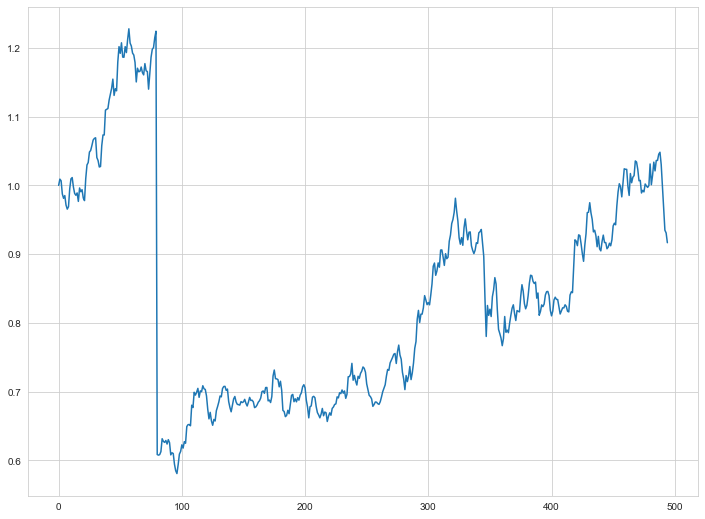

In [132]:
plt.figure(figsize=(12,9))
plt.plot(R_cum_returns)
plt.show()

In [133]:
pnb=pd.read_csv('PNB.csv')
pnb

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PNB,EQ,15-May-2017,169.15,169.95,171.30,166.20,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
1,PNB,EQ,16-May-2017,166.80,167.35,178.00,164.80,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2,PNB,EQ,17-May-2017,174.15,173.00,173.10,164.30,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52
3,PNB,EQ,18-May-2017,165.05,163.40,164.40,157.90,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34
4,PNB,EQ,19-May-2017,158.50,159.50,162.25,154.10,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,PNB,EQ,07-May-2019,86.25,86.70,87.15,83.40,84.05,83.95,85.62,16356567,1.400418e+09,37679,2333933,14.27
490,PNB,EQ,08-May-2019,83.95,83.75,85.40,83.25,84.05,83.95,84.43,23380690,1.974095e+09,52244,2674859,11.44
491,PNB,EQ,09-May-2019,83.95,84.10,85.35,82.80,84.50,84.25,84.30,22934344,1.933317e+09,44704,2025433,8.83
492,PNB,EQ,10-May-2019,84.25,85.00,87.25,84.40,86.00,86.25,85.53,21821500,1.866353e+09,44879,1950720,8.94


In [134]:
pnb['Daily Return']=((pnb['Close Price']-pnb['Open Price'])/pnb['Open Price'])*100
pnb

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Daily Return
0,PNB,EQ,15-May-2017,169.15,169.95,171.30,166.20,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09,-1.853486
1,PNB,EQ,16-May-2017,166.80,167.35,178.00,164.80,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26,4.063340
2,PNB,EQ,17-May-2017,174.15,173.00,173.10,164.30,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52,-4.595376
3,PNB,EQ,18-May-2017,165.05,163.40,164.40,157.90,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34,-2.998776
4,PNB,EQ,19-May-2017,158.50,159.50,162.25,154.10,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27,-2.695925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,PNB,EQ,07-May-2019,86.25,86.70,87.15,83.40,84.05,83.95,85.62,16356567,1.400418e+09,37679,2333933,14.27,-3.171857
490,PNB,EQ,08-May-2019,83.95,83.75,85.40,83.25,84.05,83.95,84.43,23380690,1.974095e+09,52244,2674859,11.44,0.238806
491,PNB,EQ,09-May-2019,83.95,84.10,85.35,82.80,84.50,84.25,84.30,22934344,1.933317e+09,44704,2025433,8.83,0.178359
492,PNB,EQ,10-May-2019,84.25,85.00,87.25,84.40,86.00,86.25,85.53,21821500,1.866353e+09,44879,1950720,8.94,1.470588


In [135]:
mean_daily_return=pnb['Daily Return'].mean()
std_daily_return=pnb['Daily Return'].std()
print(mean_daily_return)
print(std_daily_return)

-0.2849847192387193
2.988646485449969


In [136]:
annualize_mean_daily_return=mean_daily_return*252
annualize_std_daily_return=std_daily_return*np.sqrt(252)
print(annualize_mean_daily_return)
print(annualize_std_daily_return)

-71.81614924815727
47.44329214312702


In [137]:
jet=pd.read_csv('JETAIRWAYS.csv')
dhfl=pd.read_csv('DHFL.csv')
adani=pd.read_csv('ADANIPOWER.csv')
tcs=pd.read_csv('TCS.csv')

In [138]:
assets= ["pnb","jet","dhfl","adani","tcs"]
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
df=pd.DataFrame()
df['pnb']=pnb['Close Price']
df['jet']=jet['Close Price']
df['dhfl']=dhfl['Close Price']
df['adani']=adani['Close Price']
df['tcs']=tcs['Close Price']
df.index=pnb['Date']
df

,pnb,jet,dhfl,adani,tcs
Date,,,,,
15-May-2017,166.80,527.50,431.40,30.25,2365.10
16-May-2017,174.15,534.15,1009.90,32.85,2429.15
17-May-2017,165.05,528.90,1055.20,33.10,2455.35
18-May-2017,158.50,522.70,1070.00,31.90,2536.20
19-May-2017,155.20,520.40,1050.00,32.40,2507.15
...,...,...,...,...,...
07-May-2019,83.95,127.30,1090.05,41.50,2260.35
08-May-2019,83.95,131.35,1116.17,41.35,2215.40
09-May-2019,84.25,147.40,448.45,40.95,2132.00


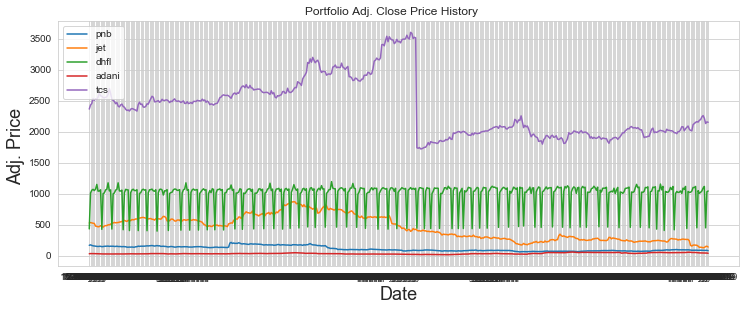

In [139]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
    plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price ',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [140]:
returns = df.pct_change()
returns

,pnb,jet,dhfl,adani,tcs
Date,,,,,
15-May-2017,NaN,NaN,NaN,NaN,NaN
16-May-2017,0.044065,0.012607,1.340983,0.085950,0.027081
17-May-2017,-0.052254,-0.009829,0.044856,0.007610,0.010786
18-May-2017,-0.039685,-0.011722,0.014026,-0.036254,0.032928
19-May-2017,-0.020820,-0.004400,-0.018692,0.015674,-0.011454
...,...,...,...,...,...
07-May-2019,-0.026667,-0.045727,0.044289,-0.030374,0.009738
08-May-2019,0.000000,0.031815,0.023962,-0.003614,-0.019886
09-May-2019,0.003574,0.122193,-0.598224,-0.009674,-0.037646


In [141]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,pnb,jet,dhfl,adani,tcs
pnb,0.297450,0.085877,-0.123573,0.100218,0.005671
jet,0.085877,0.390442,-0.125231,0.092228,-0.006220
dhfl,-0.123573,-0.125231,70.967088,0.094929,0.146275
adani,0.100218,0.092228,0.094929,0.372750,0.011077
tcs,0.005671,-0.006220,0.146275,0.011077,0.186095


In [142]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

2.9110531387451815

In [143]:
port_volatility = np.sqrt(port_variance)
port_volatility

1.7061808634330597

In [144]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

5.503374104517762

In [145]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 550.0%
Annual volatility/standard deviation/risk : 171.0%
Annual variance : 291.0%


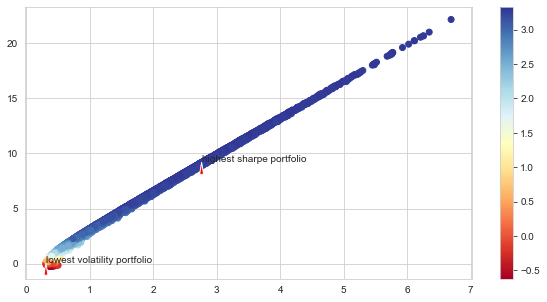

In [146]:
mean_daily_returns=returns.mean()
cov_matrix=returns.cov()
#set number of runs of random portfolio weights
num_portfolios = 25000
#set up array to hold results
results = np.zeros((3,num_portfolios))
for i in np.arange(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])
#create scatter plot coloured by Sharpe Ratio
arrow_properties = dict(
    facecolor="red", width=0.5,
    headwidth=4, shrink=0.1)
x=results_frame[results_frame['sharpe']==results_frame['sharpe'].max()]['ret']
y=results_frame[results_frame['sharpe']==results_frame['sharpe'].max()]['stdev']
x1=results_frame[results_frame['stdev']==results_frame['stdev'].min()]['ret']
y1=results_frame[results_frame['stdev']==results_frame['stdev'].min()]['stdev']
plt.figure(figsize=(10,5))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.annotate('highest sharpe portfolio',(y,x),arrowprops=arrow_properties)
plt.annotate('lowest volatility portfolio',(y1,x1),arrowprops=arrow_properties)
plt.colorbar()

In [147]:
ncc=pd.read_csv('NCC.csv')
raymond=pd.read_csv('RAYMOND.csv')
pvr=pd.read_csv('PVR.csv')
luxind=pd.read_csv('LUXIND.csv')
ashoka=pd.read_csv('ASHOKA.csv')
idfc=pd.read_csv('IDFC.csv')
itdc=pd.read_csv('ITDC.csv')
fortis=pd.read_csv('FORTIS.csv')
jet=pd.read_csv('JETAIRWAYS.csv')
bajaj=pd.read_csv('BAJAJELEC.csv')

In [148]:
pnb=pd.read_csv('PNB.csv')
voltas=pd.read_csv('VOLTAS.csv')
igl=pd.read_csv('IGL.csv')
idbi=pd.read_csv('IDBI.csv')
mrpl=pd.read_csv('MRPL.csv')
nbcc=pd.read_csv('NBCC.csv')
sun=pd.read_csv('SUNTV.csv')
tata=pd.read_csv('TATACHEM.csv')
dhfl=pd.read_csv('DHFL.csv')
adani=pd.read_csv('ADANIPOWER.csv')

In [149]:
gail=pd.read_csv('GAIL.csv')
hdfc=pd.read_csv('HDFC.csv')
bpcl=pd.read_csv('BPCL.csv')
cipla=pd.read_csv('CIPLA.csv')
lt=pd.read_csv('LT.csv')
itc=pd.read_csv('ITC.csv')
ioc=pd.read_csv('IOC.csv')
tcs=pd.read_csv('TCS.csv')
axis=pd.read_csv('AXISBANK.csv')
titan=pd.read_csv('TITAN.csv')

In [150]:
df=pd.DataFrame()
df['ncc']=ncc['Close Price']
df['raymond']=raymond['Close Price']
df['pvr']=pvr['Close Price']
df['luxind']=luxind['Close Price']
df['ashoka']=ashoka['Close Price']
df['idfc']=idfc['Close Price']
df['itdc']=itdc['Close Price']
df['fortis']=fortis['Close Price']
df['jet']=jet['Close Price']
df['bajaj']=bajaj['Close Price']
df['pnb']=pnb['Close Price']
df['voltas']=voltas['Close Price']
df['igl']=igl['Close Price']
df['idbi']=idbi['Close Price']
df['mrpl']=mrpl['Close Price']
df['nbcc']=nbcc['Close Price']
df['sun']=sun['Close Price']
df['tata']=tata['Close Price']
df['dhfl']=dhfl['Close Price']
df['adani']=adani['Close Price']
df['gail']=gail['Close Price']
df['hdfc']=hdfc['Close Price']
df['bpcl']=bpcl['Close Price']
df['cipla']=cipla['Close Price']
df['lt']=lt['Close Price']
df['itc']=itc['Close Price']
df['ioc']=ioc['Close Price']
df['tcs']=tcs['Close Price']
df['axis']=axis['Close Price']
df['titan']=titan['Close Price']

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 30 columns):
ncc        497 non-null float64
raymond    494 non-null float64
pvr        495 non-null float64
luxind     494 non-null float64
ashoka     494 non-null float64
idfc       495 non-null float64
itdc       494 non-null float64
fortis     495 non-null float64
jet        494 non-null float64
bajaj      494 non-null float64
pnb        494 non-null float64
voltas     494 non-null float64
igl        497 non-null float64
idbi       494 non-null float64
mrpl       494 non-null float64
nbcc       494 non-null float64
sun        494 non-null float64
tata       497 non-null float64
dhfl       497 non-null float64
adani      494 non-null float64
gail       494 non-null float64
hdfc       497 non-null float64
bpcl       495 non-null float64
cipla      496 non-null float64
lt         494 non-null float64
itc        496 non-null float64
ioc        495 non-null float64
tcs        497 non-null float64

In [152]:
df

,ncc,raymond,pvr,luxind,ashoka,idfc,itdc,fortis,jet,bajaj,...,gail,hdfc,bpcl,cipla,lt,itc,ioc,tcs,axis,titan
0,97.35,772.80,1524.95,819.60,216.05,63.70,650.15,205.25,527.50,341.15,...,414.00,1559.50,727.85,569.00,1742.40,277.95,442.10,2365.10,500.10,483.65
1,100.40,785.00,1539.00,817.50,214.90,64.25,636.70,207.90,534.15,347.00,...,411.40,205.00,733.30,565.60,1740.70,283.45,446.60,2429.15,501.50,488.30
2,101.45,783.65,1530.30,819.80,217.00,63.35,626.75,205.90,528.90,349.85,...,408.30,1566.55,727.45,562.35,1755.45,281.65,444.25,2455.35,502.80,481.75
3,97.00,746.95,1515.05,820.05,209.65,61.50,604.65,196.85,522.70,334.10,...,404.75,1552.50,714.90,560.10,1722.60,277.90,439.90,2536.20,492.00,471.65
4,95.45,723.10,1513.55,817.80,206.25,61.15,594.30,203.55,520.40,336.20,...,401.05,207.00,702.45,564.95,1724.55,286.20,435.40,2507.15,501.70,471.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,92.65,804.40,1758.45,1239.95,117.45,37.60,251.15,133.00,151.75,540.90,...,341.55,1853.00,368.05,558.00,1355.50,300.65,150.60,2157.85,731.00,1088.70
493,93.60,779.35,1715.40,1211.55,117.15,38.10,242.75,131.90,139.10,541.55,...,332.05,380.15,362.95,557.75,1317.65,299.85,147.60,2151.95,735.05,1104.45
494,91.45,NaN,1724.00,NaN,NaN,34.75,NaN,129.70,NaN,NaN,...,NaN,1819.20,355.10,555.55,NaN,297.75,142.60,2152.85,732.10,1132.10
495,95.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,350.00,NaN,546.70,NaN,289.30,NaN,2172.55,NaN,1144.70


In [153]:
df2=df.copy()
df2

,ncc,raymond,pvr,luxind,ashoka,idfc,itdc,fortis,jet,bajaj,...,gail,hdfc,bpcl,cipla,lt,itc,ioc,tcs,axis,titan
0,97.35,772.80,1524.95,819.60,216.05,63.70,650.15,205.25,527.50,341.15,...,414.00,1559.50,727.85,569.00,1742.40,277.95,442.10,2365.10,500.10,483.65
1,100.40,785.00,1539.00,817.50,214.90,64.25,636.70,207.90,534.15,347.00,...,411.40,205.00,733.30,565.60,1740.70,283.45,446.60,2429.15,501.50,488.30
2,101.45,783.65,1530.30,819.80,217.00,63.35,626.75,205.90,528.90,349.85,...,408.30,1566.55,727.45,562.35,1755.45,281.65,444.25,2455.35,502.80,481.75
3,97.00,746.95,1515.05,820.05,209.65,61.50,604.65,196.85,522.70,334.10,...,404.75,1552.50,714.90,560.10,1722.60,277.90,439.90,2536.20,492.00,471.65
4,95.45,723.10,1513.55,817.80,206.25,61.15,594.30,203.55,520.40,336.20,...,401.05,207.00,702.45,564.95,1724.55,286.20,435.40,2507.15,501.70,471.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,92.65,804.40,1758.45,1239.95,117.45,37.60,251.15,133.00,151.75,540.90,...,341.55,1853.00,368.05,558.00,1355.50,300.65,150.60,2157.85,731.00,1088.70
493,93.60,779.35,1715.40,1211.55,117.15,38.10,242.75,131.90,139.10,541.55,...,332.05,380.15,362.95,557.75,1317.65,299.85,147.60,2151.95,735.05,1104.45
494,91.45,NaN,1724.00,NaN,NaN,34.75,NaN,129.70,NaN,NaN,...,NaN,1819.20,355.10,555.55,NaN,297.75,142.60,2152.85,732.10,1132.10
495,95.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,350.00,NaN,546.70,NaN,289.30,NaN,2172.55,NaN,1144.70


In [159]:
df2=df2.pct_change()*100
df2

,ncc,raymond,pvr,luxind,ashoka,idfc,itdc,fortis,jet,bajaj,...,gail,hdfc,bpcl,cipla,lt,itc,ioc,tcs,axis,titan
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.133025,1.578675,0.921342,-0.256223,-0.532284,0.863422,-2.068753,1.291108,1.260664,1.714788,...,-0.628019,-86.854761,0.748781,-0.597540,-0.097567,1.978773,1.017869,2.708131,0.279944,0.961439
2,1.045817,-0.171975,-0.565302,0.281346,0.977199,-1.400778,-1.562745,-0.962001,-0.982870,0.821326,...,-0.753525,664.170732,-0.797764,-0.574611,0.847360,-0.635033,-0.526198,1.078567,0.259222,-1.341388
3,-4.386397,-4.683213,-0.996537,0.030495,-3.387097,-2.920284,-3.526127,-4.395338,-1.172244,-4.501929,...,-0.869459,-0.896875,-1.725204,-0.400107,-1.871315,-1.331440,-0.979178,3.292810,-2.147971,-2.096523
4,-1.597938,-3.192985,-0.099007,-0.274374,-1.621751,-0.569106,-1.711734,3.403607,-0.440023,0.628554,...,-0.914145,-86.666667,-1.741502,0.865917,0.113201,2.986686,-1.022960,-1.145414,1.971545,-0.106011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,-1.120598,-0.111760,0.569059,-0.660952,1.864701,0.000000,1.989848,-0.449102,2.951153,1.701608,...,0.337838,364.352838,-3.093734,0.008961,-0.070036,-0.414044,-1.051248,1.212477,-0.611829,0.202485
493,1.025364,-3.114122,-2.448179,-2.290415,-0.255428,1.329787,-3.344615,-0.827068,-8.336079,0.120170,...,-2.781438,-79.484620,-1.385681,-0.044803,-2.792328,-0.266090,-1.992032,-0.273420,0.554036,1.446680
494,-2.297009,0.000000,0.501341,0.000000,0.000000,-8.792651,0.000000,-1.667930,0.000000,0.000000,...,0.000000,378.547942,-2.162832,-0.394442,0.000000,-0.700350,-3.387534,0.041823,-0.401333,2.503509
495,4.866047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-80.760774,0.000000,-1.593016,0.000000,-2.837951,0.000000,0.915066,0.000000,1.112976


In [160]:
mean_annual_return=pd.DataFrame()
mean_annual_return=df2.mean()*252
mean_annual_return

ncc            5.900008
raymond        6.959701
pvr           11.042078
luxind        25.361752
ashoka       -20.724738
idfc         -24.394874
itdc         -36.715116
fortis       -14.494083
jet          -47.810941
bajaj         31.414157
pnb          -23.799187
voltas        18.987474
igl          -15.524673
idbi         -29.421789
mrpl         -32.100366
nbcc         -51.206003
sun          -20.446012
tata          -0.293751
dhfl        2741.545032
adani         30.342622
gail          -5.223306
hdfc       45593.743801
bpcl         -25.983860
cipla          1.174504
lt            -8.538411
itc            4.565033
ioc          -41.119912
tcs            7.625024
axis          23.178386
titan         48.862202
dtype: float64

In [161]:
data=pd.DataFrame()
data['mean_annual_return']=(df2.mean()*252).T
data['volatility_annual_return']=(df2.std()*np.sqrt(252)).T
data

,mean_annual_return,volatility_annual_return
ncc,5.900008,44.383910
raymond,6.959701,36.273044
pvr,11.042078,30.926695
luxind,25.361752,33.439354
ashoka,-20.724738,44.163124
idfc,-24.394874,35.833948
itdc,-36.715116,52.616189
fortis,-14.494083,42.036167
jet,-47.810941,62.296175
bajaj,31.414157,40.119524


In [162]:
X=data.copy()
X.index=np.arange(0,30)
X.columns=[1,2]
X

,1,2
0,5.900008,44.383910
1,6.959701,36.273044
2,11.042078,30.926695
3,25.361752,33.439354
4,-20.724738,44.163124
5,-24.394874,35.833948
6,-36.715116,52.616189
7,-14.494083,42.036167
8,-47.810941,62.296175
9,31.414157,40.119524


In [163]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.19541992, -0.21317726],
       [-0.19529043, -0.22364694],
       [-0.19479156, -0.23054812],
       [-0.19304172, -0.22730473],
       [-0.19867343, -0.21346226],
       [-0.19912192, -0.22421373],
       [-0.20062744, -0.20255087],
       [-0.19791205, -0.21620778],
       [-0.20198333, -0.19005574],
       [-0.19230212, -0.21868182],
       [-0.19904912, -0.20028241],
       [-0.19382065, -0.23078755],
       [-0.19803799, -0.18653559],
       [-0.1997362 , -0.2120706 ],
       [-0.20006352, -0.22338098],
       [-0.2023982 , -0.20500691],
       [-0.19863937, -0.22344352],
       [-0.19617679, -0.2386872 ],
       [ 0.1388726 ,  0.81564088],
       [-0.19243306, -0.19189911],
       [-0.19677917, -0.22691694],
       [ 5.37535951,  5.29120702],
       [-0.19931609, -0.21430514],
       [-0.19599737, -0.23772283],
       [-0.19718428, -0.2300186 ],
       [-0.19558305, -0.24153209],
       [-0.2011657 , -0.20611734],
       [-0.19520912, -0.21492495],
       [-0.19330852,

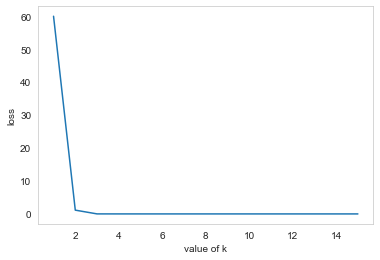

In [167]:
from sklearn.cluster import KMeans
loss=[]
for k in np.arange(1,16):
    model=KMeans(n_clusters=k,init='k-means++',n_jobs=-1)
    model.fit(X)
    loss.append(model.inertia_)
    
plt.plot(np.arange(1,16),loss)
plt.grid()
plt.ylabel("loss")
plt.xlabel("value of k")
plt.show()

In [168]:
loss_per_k=dict(zip(np.arange(1,16),loss))
loss_per_k

{1: 59.99999999999999,
 2: 1.1468673253807915,
 3: 0.006213242815116213,
 4: 0.00205732021506817,
 5: 0.0010168309595944012,
 6: 0.000664555684645048,
 7: 0.0003576048751172974,
 8: 0.00024984663421122143,
 9: 0.00020617816013293556,
 10: 0.00016643106482539953,
 11: 0.00012922254674851944,
 12: 0.00011374435919761393,
 13: 9.102628289108506e-05,
 14: 7.704771579383837e-05,
 15: 6.131815353790698e-05}

In [169]:
min_loss=min(loss)
for key,value in loss_per_k.items():
    if(value==min_loss):
        print("optimal no. of cluster:-",key)

optimal no. of cluster:- 15


In [170]:
 model1=KMeans(n_clusters=3,init='k-means++',n_jobs=-1)
model1.fit(X)
print(model1.cluster_centers_)

[[-0.19693686 -0.21810171]
 [ 5.37535951  5.29120702]
 [ 0.1388726   0.81564088]]


In [171]:
y_kmeans = model1.fit_predict(X)

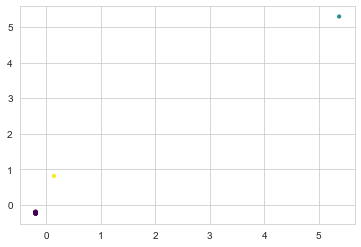

In [175]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=10,cmap='viridis')
plt.show()

In [176]:
model1=KMeans(n_clusters=5,init='k-means++',n_jobs=-1)
model1.fit(X)
print(model1.cluster_centers_)

[[-0.19742583 -0.21795591]
 [ 5.37535951  5.29120702]
 [ 0.1388726   0.81564088]
 [-0.19468531 -0.23268849]
 [-0.19938498 -0.19749257]]


In [177]:
y_kmeans = model1.fit_predict(X)

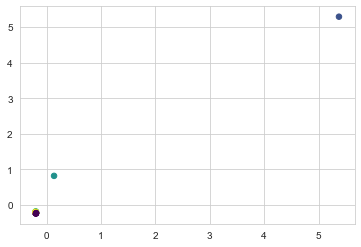

In [179]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=30,cmap='viridis')
plt.show()

In [180]:
model1=KMeans(n_clusters=10,init='k-means++',n_jobs=-1)
model1.fit(X)
print(model1.cluster_centers_)

[[-0.19371945 -0.23033765]
 [ 5.37535951  5.29120702]
 [ 0.1388726   0.81564088]
 [-0.20081012 -0.20348938]
 [-0.19230212 -0.21868182]
 [-0.20001066 -0.18829566]
 [-0.19771114 -0.21402467]
 [-0.19797888 -0.22432042]
 [-0.19591907 -0.23931404]
 [-0.19243306 -0.19189911]]


In [181]:
y_kmeans = model1.fit_predict(X)

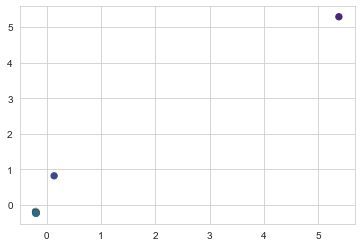

In [182]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=40,cmap='viridis')
plt.show()

# I have tried everything with no. of clusters from 2 to 12 but the data always gets clustered into three parts,
# The behind this is probably the difference in the annual mean return and volatility of mid caps , small caps and large caps company,as i had taken 10 of each of them
# So clusteing plot will remain of same type even by standardization or change in no. of clusters
